## ETL

In [1]:
# Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
# Displaying option: all columns
pd.set_option('display.max_columns', None)

##### Importing files

In [3]:
apacheApsVar = pd.read_csv('./data/initial_dataframes/apacheApsVar.csv', sep=",")
apachePredVar = pd.read_csv('./data/initial_dataframes/apachePredVar.csv', sep=",")
patient = pd.read_csv('./data/initial_dataframes/patient.csv', sep=",")

In [4]:
apacheApsVar.head()

apacheapsvarid  patientunitstayid  intubated  vent  dialysis  eyes  motor  \
0           92788             141765          0     0         0     4      6   
1            8893             143870          0     0         0     4      6   
2           79585             144815          0     0         0     4      6   
3          203242             145427          0     0         0     4      6   
4          154681             147307          0     0         0     4      6   

   verbal  meds  urine   wbc  temperature  respiratoryrate  sodium  heartrate  \
0       5     0   -1.0  10.2         36.2               39   139.0         88   
1       5     0   -1.0  11.7         36.4               60   133.0         40   
2       5     0   -1.0   7.9         36.7                6   141.0        131   
3       5     0   -1.0  21.1         36.2               41   141.0         49   
4       5     0   -1.0  -1.0         36.8               33    -1.0        115   

   meanbp   ph  hematocrit  creatinine  albumin  pao2  pco2   bun  glucose  \
0     108 -1.0        37.8        1.04     -1.0  -1.0  -1.0  28.0       61   
1      47 -1.0        34.1        1.14     -1.0  -1.0  -1.0  14.0      140   
2      61 -1.0        36.6        0.63      3.6  -1.0  -1.0   6.0       82   
3      72 -1.0        40.4        1.05     -1.0  -1.0  -1.0  14.0      118   
4     107 -1.0        -1.0       -1.00     -1.0  -1.0  -1.0  -1.0       -1   

   bilirubin  fio2  
0       -1.0    -1  
1       -1.0    -1  
2        0.5    -1  
3       -1.0    -1  
4       -1.0    -1

In [5]:
apachePredVar.head()

apachepredvarid  patientunitstayid  sicuday  saps3day1  saps3today  \
0             4004             141765        1          0           0   
1             8047             143870        1          0           0   
2          1798882             144815        1          0           0   
3          1485310             145427        1          0           0   
4            27991             147307        1          0           0   

   saps3yesterday  gender  teachtype  region  bedcount  admitsource  \
0               0       1          0       3        12            8   
1               0       0          0       3        14            1   
2               0       1          0       3         8            8   
3               0       0          0       3        14            1   
4               0       1          0       3        43            1   

   graftcount  meds  verbal  motor  eyes   age admitdiagnosis  thrombolytics  \
0           3     0       5      6     4  87.0       RHYTHATR              0   
1           3     0       5      6     4  76.0     S-CAROTEND              0   
2           3     0       5      6     4  34.0        ODOTHER              0   
3           3     0       5      6     4  61.0     S-GIPERFOR              0   
4           3     0       5      6     4  55.0     S-CAROTEND              0   

   diedinhospital  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0               0     0               0         0                 0         0   
1               0     0               0         0                 0         0   
2               0     0               0         0                 0         0   
3               0     0               0         0                 0         0   
4               0     0               0         0                 0         0   

   immunosuppression  cirrhosis  electivesurgery  activetx  readmit  ima  \
0                  0          0              NaN         0        0    0   
1                  0          0              0.0         0        0    0   
2                  0          0              NaN         0        0    0   
3                  0          0              0.0         0        0    0   
4                  0          0              1.0         0        0    0   

   midur  ventday1  oobventday1  oobintubday1  diabetes  managementsystem  \
0      0         0            0             0         0                 1   
1      0         0            0             0         0                 1   
2      0         0            0             0         0                 1   
3      0         0            0             0         0                 1   
4      0         0            0             0         0                 1   

   var03hspxlos  pao2  fio2  ejectfx  creatinine  dischargelocation  \
0             0  -1.0    -1       -1        1.04                  4   
1             0  -1.0    -1       -1        1.14                  4   
2             0  -1.0    -1       -1        0.63                  8   
3             0  -1.0    -1       -1        1.05                  4   
4             0  -1.0    -1       -1       -1.00                  4   

   visitnumber  amilocation  day1meds  day1verbal  day1motor  day1eyes  \
0            1           -1         0           5          6         4   
1            1           -1         0           5          6         4   
2            1           -1         0           5          6         4   
3            1           -1         0           5          6         4   
4            1           -1         0           5          6         4   

   day1pao2  day1fio2  
0      -1.0        -1  
1      -1.0        -1  
2      -1.0        -1  
3      -1.0        -1  
4      -1.0        -1

In [6]:
patient.head()

patientunitstayid  patienthealthsystemstayid  gender age  ethnicity  \
0             141764                     129391  Female  87  Caucasian   
1             141765                     129391  Female  87  Caucasian   
2             143870                     131022    Male  76  Caucasian   
3             144815                     131736  Female  34  Caucasian   
4             145427                     132209    Male  61  Caucasian   

   hospitalid  wardid                              apacheadmissiondx  \
0          59      91                                            NaN   
1          59      91  Rhythm disturbance (atrial, supraventricular)   
2          68     103                        Endarterectomy, carotid   
3          56      82          Overdose, other toxin, poison or drug   
4          68     103            GI perforation/rupture, surgery for   

   admissionheight hospitaladmittime24  hospitaladmitoffset  \
0            157.5            23:36:00                -2258   
1            157.5            23:36:00                   -8   
2            167.0            20:46:00                   -1   
3            172.7            01:44:00                  -23   
4            177.8            23:48:00                  -10   

    hospitaladmitsource  hospitaldischargeyear hospitaldischargetime24  \
0                   NaN                   2015                19:20:00   
1                   NaN                   2015                19:20:00   
2        Operating Room                   2014                17:05:00   
3  Emergency Department                   2015                21:05:00   
4  Emergency Department                   2014                15:41:00   

   hospitaldischargeoffset hospitaldischargelocation hospitaldischargestatus  \
0                      366                      Home                   Alive   
1                     2616                      Home                   Alive   
2                     1218                      Home                   Alive   
3                     1138            Other Hospital                   Alive   
4                     5263                      Home                   Alive   

       unittype unitadmittime24       unitadmitsource  unitvisitnumber  \
0  Med-Surg ICU        13:14:00            ICU to SDU                2   
1  Med-Surg ICU        23:44:00  Emergency Department                1   
2          SICU        20:47:00        Operating Room                1   
3  Med-Surg ICU        02:07:00  Emergency Department                1   
4          SICU        23:58:00        Operating Room                1   

     unitstaytype  admissionweight  dischargeweight unitdischargetime24  \
0  stepdown/other              NaN              NaN            18:58:00   
1           admit             46.5             45.0            13:14:00   
2           admit             77.5             79.4            10:00:00   
3           admit             60.3             60.7            20:48:00   
4           admit             91.7             93.1            22:47:00   

   unitdischargeoffset unitdischargelocation unitdischargestatus  uniquepid  
0                  344                  Home               Alive   002-1039  
1                 2250  Step-Down Unit (SDU)               Alive   002-1039  
2                  793                 Floor               Alive  002-12289  
3                 1121        Other External               Alive   002-1116  
4                 1369                 Floor               Alive  002-12243

### Features engineering 

###### apacheApsVar:

In [7]:
# replacing '-1' values in the dataframe because '-1' represent missing values 
# in apacheApsVar

apacheApsVar.replace(-1, np.nan, inplace=True)

# creating a new variable: 'glasgow' score from 'eyes', 
# 'motor' and 'verbal' assessement
glasgow = []
for i in range(len(apacheApsVar)):
    glasgow.append(apacheApsVar.iloc[i]['eyes'] + apacheApsVar.iloc[i]['motor'] 
                   + apacheApsVar.iloc[i]['verbal'])

apacheApsVar["glasgow"] = glasgow

# creating a subset for all interesting variables 
# of the apacheApsVar dataframe :
my_variables = ['patientunitstayid', 'intubated', 'vent', 'dialysis', 'wbc', 
                'temperature', 'respiratoryrate','heartrate', 'sodium', 
                'meanbp', 'ph', 'hematocrit', 'creatinine', 'albumin',
                'pao2', 'pco2','glucose', 'bilirubin', 'glasgow']

apacheApsVarSubset = apacheApsVar[my_variables]

###### apachePredVar:

In [8]:
# replacing '-1' values in the dataframe because '-1' represent missing values 
# in apachePredVar
apachePredVar.replace(-1, np.nan, inplace=True)

# creating a subset for all interesting variables of the apacheApsVar dataframe:

my_variables = ['patientunitstayid', 'gender', 'age', 'thrombolytics', 'aids',  #add ethnicity
                'hepaticfailure', 'lymphoma', 'metastaticcancer', 'leukemia', 
                'immunosuppression', 'cirrhosis']

apachePredVarSubset = apachePredVar[my_variables]

###### patient:

In [9]:
# replacing empty strings '' values in the dataframe because '' represent 
# missing values in 'patient' dataframe
patient.replace("", np.nan, inplace=True)

# creating new variable for BMI from 'admissionheight' and 'admissionweight':
BMI = []
for i in range(len(patient)):
    if patient.iloc[i]['admissionweight'] != np.nan and patient.iloc[i]['admissionheight'] != np.nan:
        BMI.append(patient.iloc[i]['admissionweight']/((patient.iloc[i]['admissionheight']/100)**2))
patient['BMI'] = BMI

# creating binary outcome variable from 'hospitaldischargestatus' :
patient = pd.get_dummies(patient, prefix=['hospitaldischargestatus'], columns=['hospitaldischargestatus'])
patient['hospital_survival'] = patient['hospitaldischargestatus_Alive']

# creating variable for patients with sepsis :
sepsis = []
for i in range(len(patient)):
    if "Sepsis" in str(patient.iloc[i]['apacheadmissiondx']):
      sepsis.append(1)
    else:
      sepsis.append(0)

patient['sepsis'] = sepsis

# creating a subset for all interesting variables of the apacheApsVar dataframe :
my_variables = ['patientunitstayid', 'patienthealthsystemstayid', 'uniquepid','ethnicity',
                'apacheadmissiondx', 'BMI', 'hospital_survival', 'sepsis']

patientSubset = patient[my_variables]

###### Merging tables on patientunitstayid

In [10]:
# merging tables on 'patientunitstayid' :
my_df_all_patients = pd.merge(apacheApsVarSubset, apachePredVarSubset)
my_df_all_patients = pd.merge(my_df_all_patients, patientSubset)

In [11]:
my_df_all_patients.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
0             141765          0     0         0  10.2         36.2   
1             143870          0     0         0  11.7         36.4   
2             144815          0     0         0   7.9         36.7   
3             145427          0     0         0  21.1         36.2   
4             147307          0     0         0   NaN         36.8   

   respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
0             39.0       88.0   139.0   108.0 NaN        37.8        1.04   
1             60.0       40.0   133.0    47.0 NaN        34.1        1.14   
2              6.0      131.0   141.0    61.0 NaN        36.6        0.63   
3             41.0       49.0   141.0    72.0 NaN        40.4        1.05   
4             33.0      115.0     NaN   107.0 NaN         NaN         NaN   

   albumin  pao2  pco2  glucose  bilirubin  glasgow  gender   age  \
0      NaN   NaN   NaN     61.0        NaN     15.0     1.0  87.0   
1      NaN   NaN   NaN    140.0        NaN     15.0     0.0  76.0   
2      3.6   NaN   NaN     82.0        0.5     15.0     1.0  34.0   
3      NaN   NaN   NaN    118.0        NaN     15.0     0.0  61.0   
4      NaN   NaN   NaN      NaN        NaN     15.0     1.0  55.0   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   

   immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
0                  0          0                     129391   002-1039   
1                  0          0                     131022  002-12289   
2                  0          0                     131736   002-1116   
3                  0          0                     132209  002-12243   
4                  0          0                     133684  002-10241   

   ethnicity                              apacheadmissiondx        BMI  \
0  Caucasian  Rhythm disturbance (atrial, supraventricular)  18.745276   
1  Caucasian                        Endarterectomy, carotid  27.788734   
2  Caucasian          Overdose, other toxin, poison or drug  20.217741   
3  Caucasian            GI perforation/rupture, surgery for  29.007201   
4  Caucasian                        Endarterectomy, carotid  29.226505   

   hospital_survival  sepsis  
0                  1       0  
1                  1       0  
2                  1       0  
3                  1       0  
4                  1       0

In [12]:
my_df_all_patients.shape

(2205, 36)

###### Removing duplicates

removing duplicates on 'patienthealthsystemstayid" because we only want the initial prediction when the patient enter the ICU.

In [13]:
# the duplicates with the smaller 'patientunitstayid' is removed
# the earliest unit admission is kept for analysis
# this is what we want because we need to make survival prediction from initial 
# ICU admission

my_df_all_patients.drop_duplicates(subset='patienthealthsystemstayid', inplace=True)

In [14]:
my_df_all_patients.shape

(2098, 36)

In [15]:
######################################################################################################################

## EDA

Small visualization of the final dataset:

In [16]:
print("\n\n10 first rows: \n")
my_df_all_patients.head(n=10)



10 first rows: 



patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
0             141765          0     0         0  10.2         36.2   
1             143870          0     0         0  11.7         36.4   
2             144815          0     0         0   7.9         36.7   
3             145427          0     0         0  21.1         36.2   
4             147307          0     0         0   NaN         36.8   
5             147784          1     0         0  12.6         36.0   
6             148611          0     0         0   7.3         36.2   
7             149433          0     0         0   NaN          NaN   
8             149713          0     0         0   9.9         36.3   
9             151179          0     0         0  49.8         22.2   

   respiratoryrate  heartrate  sodium  meanbp    ph  hematocrit  creatinine  \
0             39.0       88.0   139.0   108.0   NaN        37.8        1.04   
1             60.0       40.0   133.0    47.0   NaN        34.1        1.14   
2              6.0      131.0   141.0    61.0   NaN        36.6        0.63   
3             41.0       49.0   141.0    72.0   NaN        40.4        1.05   
4             33.0      115.0     NaN   107.0   NaN         NaN         NaN   
5             53.0      109.0   142.0   130.0  7.38        40.9        0.54   
6             45.0      105.0   142.0   108.0   NaN        47.5        0.82   
7              NaN       98.0     NaN     NaN   NaN         NaN         NaN   
8             54.0       94.0   133.0    65.0   NaN        38.7        0.61   
9             52.0      171.0   139.0    40.0  7.23        37.7        3.02   

   albumin  pao2  pco2  glucose  bilirubin  glasgow  gender   age  \
0      NaN   NaN   NaN     61.0        NaN     15.0     1.0  87.0   
1      NaN   NaN   NaN    140.0        NaN     15.0     0.0  76.0   
2      3.6   NaN   NaN     82.0        0.5     15.0     1.0  34.0   
3      NaN   NaN   NaN    118.0        NaN     15.0     0.0  61.0   
4      NaN   NaN   NaN      NaN        NaN     15.0     1.0  55.0   
5      2.8  76.0  81.0    151.0        0.7     13.0     1.0  60.0   
6      NaN   NaN   NaN    112.0        NaN     15.0     0.0  28.0   
7      NaN   NaN   NaN      NaN        NaN      NaN     1.0  34.0   
8      3.8   NaN   NaN     97.0        0.5     14.0     1.0   NaN   
9      1.3  91.0  26.0     58.0        0.2     15.0     1.0  59.0   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   
5              0     0               0         0                 0         0   
6              0     0               0         0                 0         0   
7              0     0               0         0                 0         0   
8              0     0               0         0                 0         0   
9              0     0               0         0                 1         0   

   immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
0                  0          0                     129391   002-1039   
1                  0          0                     131022  002-12289   
2                  0          0                     131736   002-1116   
3                  0          0                     132209  002-12243   
4                  0          0                     133684  002-10241   
5                  0          0                     134042  002-10424   
6                  0          0                     134686  002-10736   
7                  0          0                     135332  002-11375   
8                  0          0                     135537  002-

### Reports Using Pandas Profiling

In [17]:
#from pandas_profiling import ProfileReport

In [18]:
#profile = ProfileReport(my_df_all_patients)
#profile

## Statistical analysis

###### Demographic Analysis

In [19]:
stat_df=my_df_all_patients.copy()

In [20]:
stat_df.sample()

patientunitstayid  intubated  vent  dialysis  wbc  temperature  \
2143            3223634          0     0         0  NaN         36.9   

      respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
2143             28.0       59.0     NaN   144.0 NaN         NaN         NaN   

      albumin  pao2  pco2  glucose  bilirubin  glasgow  gender   age  \
2143      NaN   NaN   NaN      NaN        NaN     15.0     0.0  87.0   

      thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  \
2143              0     0               0         0                 0   

      leukemia  immunosuppression  cirrhosis  patienthealthsystemstayid  \
2143         0                  0          0                    2625056   

      uniquepid  ethnicity                       apacheadmissiondx        BMI  \
2143  033-10303  Caucasian  Rhythm disturbance (conduction defect)  33.119454   

      hospital_survival  sepsis  
2143                  1       0

###### Group by Age 

In [21]:
features = ['gender',  'age','hospital_survival','BMI','sepsis']
stat_df[features].head()

gender   age  hospital_survival        BMI  sepsis
0     1.0  87.0                  1  18.745276       0
1     0.0  76.0                  1  27.788734       0
2     1.0  34.0                  1  20.217741       0
3     0.0  61.0                  1  29.007201       0
4     1.0  55.0                  1  29.226505       0

In [22]:
# Check NaN
stat_df[features].isnull().sum()

gender                3
age                  83
hospital_survival     0
BMI                  89
sepsis                0
dtype: int64

In [23]:
# Check Types
stat_df[features].dtypes

gender               float64
age                  float64
hospital_survival      uint8
BMI                  float64
sepsis                 int64
dtype: object

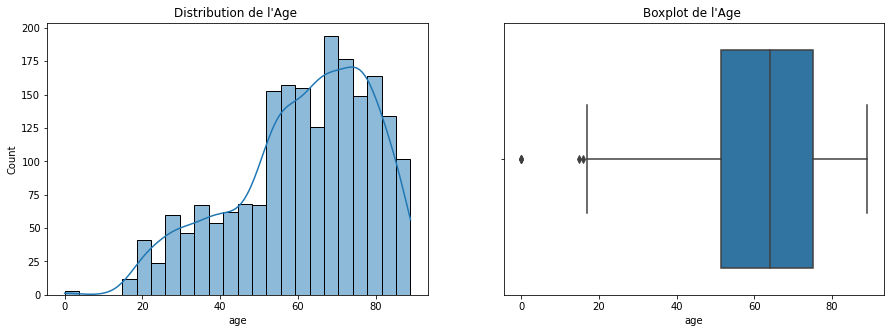

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)


sns.histplot(ax=axes[0], x="age", data=stat_df, kde=True)
axes[0].set_title("Distribution de l'Age ")

sns.boxplot(ax=axes[1], x="age", data=stat_df)
axes[1].set_title("Boxplot de l'Age ")

plt.show()

In [25]:
# Replace
stat_df['age'].fillna((stat_df['age'].mean()), inplace=True)
stat_df['gender'].fillna((stat_df['gender'].mean()), inplace=True)
#age (int)
stat_df['age'] = stat_df['age'].astype(int)
stat_df['gender'] = stat_df['gender'].astype(int)

In [26]:
stat_df[features].head()

gender  age  hospital_survival        BMI  sepsis
0       1   87                  1  18.745276       0
1       0   76                  1  27.788734       0
2       1   34                  1  20.217741       0
3       0   61                  1  29.007201       0
4       1   55                  1  29.226505       0

In [27]:
stat_df['sepsis'].value_counts()

0    1825
1     273
Name: sepsis, dtype: int64

###### Gender v/s Sepsis

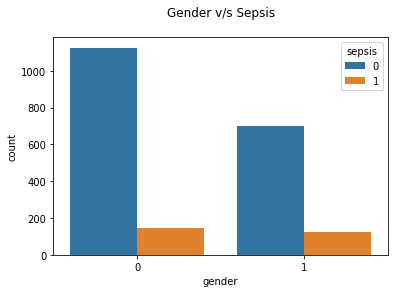

In [28]:
sns.countplot(data=stat_df, x='gender', hue='sepsis')
plt.title('Gender v/s Sepsis\n')
plt.show()

###### Gender v/s hospital_survival

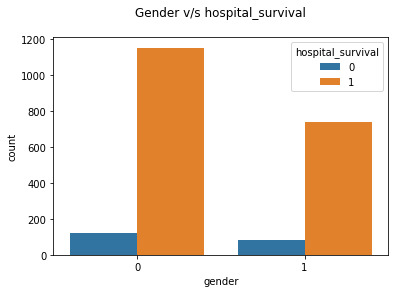

In [29]:
sns.countplot(data=stat_df, x='gender', hue='hospital_survival')
plt.title('Gender v/s hospital_survival\n')
plt.show()

In [30]:
#convert age to bins
#df = stat_df[features].replace({1:"Male", 0:"Female"})
age_bins = np.arange(0, 90, 10)
a_bin = [str(x) for x in np.arange(0, 90, 10) ]
age_labels = ["".join(x) for x in zip( [x + " - " for x in a_bin[:-1]], a_bin[1:])]
stat_df['age_bins'] = pd.cut(stat_df['age'], bins=age_bins, labels=age_labels)

###### Age Bins

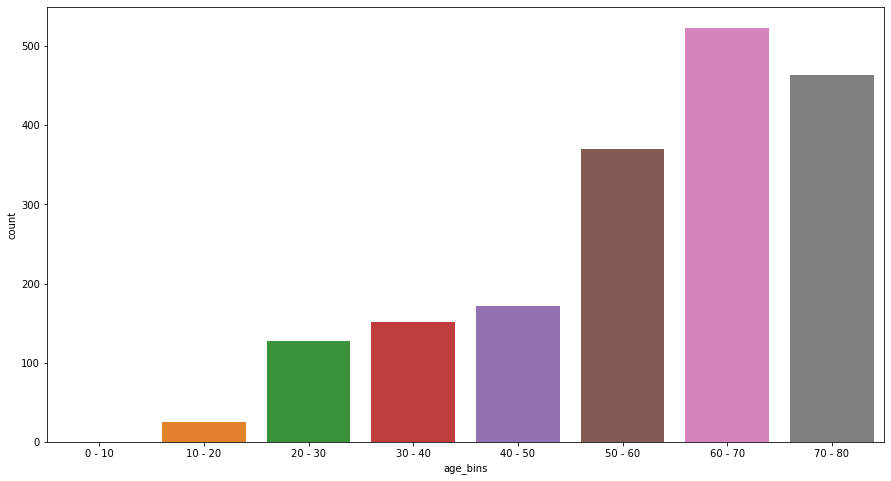

In [31]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="age_bins", data=stat_df)

###### Age bins by Gender

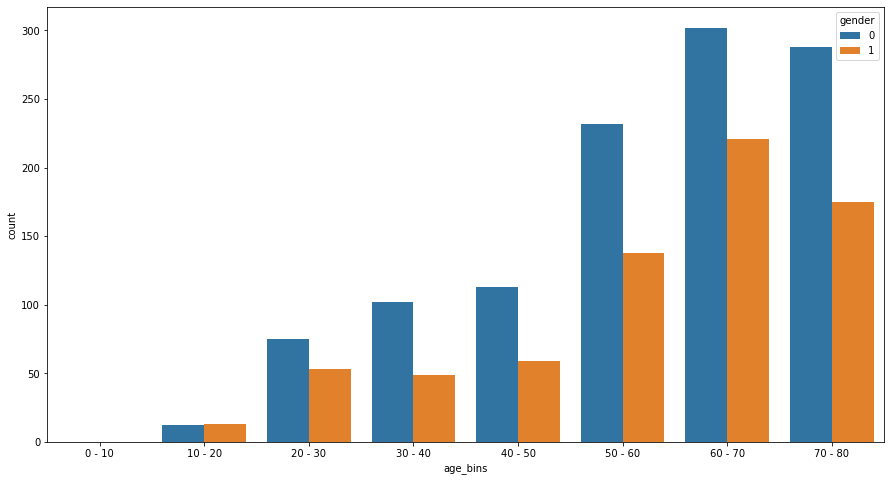

In [32]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="age_bins", hue="gender", data=stat_df)

###### Age bins, Gender by sepsis

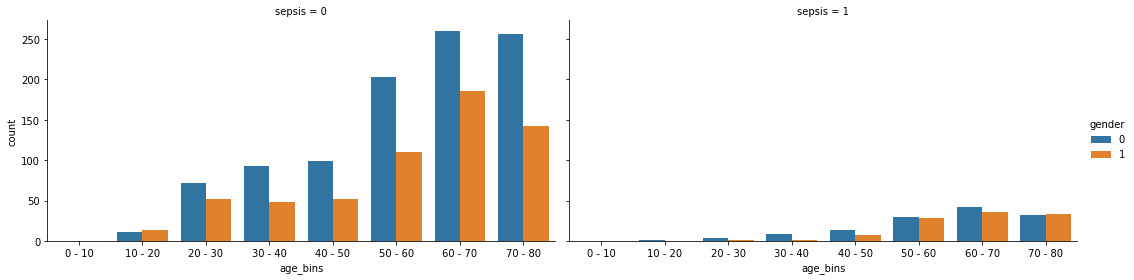

In [33]:
g = sns.catplot(x="age_bins", hue="gender", col="sepsis",
                data=stat_df, kind="count",
                height=4, aspect=1.9);

###### Age bins, Gender by hospital_survival

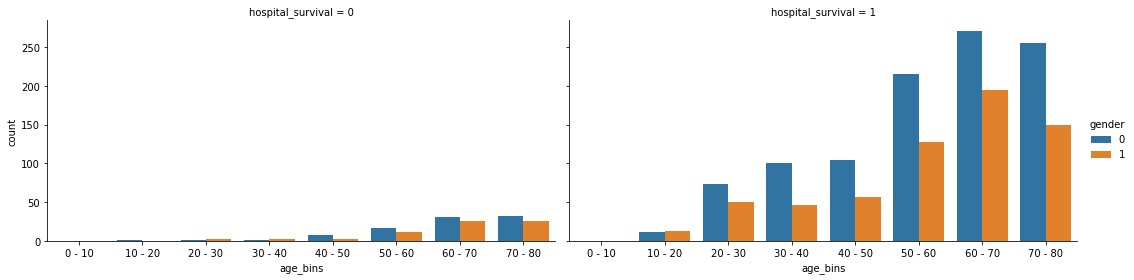

In [34]:
g = sns.catplot(x="age_bins", hue="gender", col="hospital_survival",
                data=stat_df, kind="count",
                height=4, aspect=1.9);

##### BMI Category

In [35]:
stat_df[features].head()

gender  age  hospital_survival        BMI  sepsis
0       1   87                  1  18.745276       0
1       0   76                  1  27.788734       0
2       1   34                  1  20.217741       0
3       0   61                  1  29.007201       0
4       1   55                  1  29.226505       0

In [36]:
# creating BMI categories and separating into 3 categories
stat_df['BMI_Category'] = pd.qcut(stat_df['BMI'], q=3, precision = 0)
stat_df.sample()

patientunitstayid  intubated  vent  dialysis  wbc  temperature  \
1360            2310584          0     0         0  8.3         36.6   

      respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
1360             11.0       96.0   142.0    58.0 NaN        29.0         0.6   

      albumin  pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
1360      NaN   NaN   NaN    137.0        NaN     15.0       1   68   

      thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  \
1360              0     0               0         0                 0   

      leukemia  immunosuppression  cirrhosis  patienthealthsystemstayid  \
1360         0                  0          0                    1829529   

       uniquepid  ethnicity   apacheadmissiondx        BMI  hospital_survival  \
1360  022-102676  Caucasian  Bleeding, lower GI  28.088528                  1   

      sepsis age_bins  BMI_Category  
1360       0  60 - 70  (24.0, 30.0]

In [37]:
# selecting the cut ranges for consistency with the R video
cat_bins =[0.0, 30.0, 35.0, 40.0]
stat_df['BMI_Category'] = pd.cut(stat_df['BMI'], bins=cat_bins)
stat_df.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
0             141765          0     0         0  10.2         36.2   
1             143870          0     0         0  11.7         36.4   
2             144815          0     0         0   7.9         36.7   
3             145427          0     0         0  21.1         36.2   
4             147307          0     0         0   NaN         36.8   

   respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
0             39.0       88.0   139.0   108.0 NaN        37.8        1.04   
1             60.0       40.0   133.0    47.0 NaN        34.1        1.14   
2              6.0      131.0   141.0    61.0 NaN        36.6        0.63   
3             41.0       49.0   141.0    72.0 NaN        40.4        1.05   
4             33.0      115.0     NaN   107.0 NaN         NaN         NaN   

   albumin  pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
0      NaN   NaN   NaN     61.0        NaN     15.0       1   87   
1      NaN   NaN   NaN    140.0        NaN     15.0       0   76   
2      3.6   NaN   NaN     82.0        0.5     15.0       1   34   
3      NaN   NaN   NaN    118.0        NaN     15.0       0   61   
4      NaN   NaN   NaN      NaN        NaN     15.0       1   55   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   

   immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
0                  0          0                     129391   002-1039   
1                  0          0                     131022  002-12289   
2                  0          0                     131736   002-1116   
3                  0          0                     132209  002-12243   
4                  0          0                     133684  002-10241   

   ethnicity                              apacheadmissiondx        BMI  \
0  Caucasian  Rhythm disturbance (atrial, supraventricular)  18.745276   
1  Caucasian                        Endarterectomy, carotid  27.788734   
2  Caucasian          Overdose, other toxin, poison or drug  20.217741   
3  Caucasian            GI perforation/rupture, surgery for  29.007201   
4  Caucasian                        Endarterectomy, carotid  29.226505   

   hospital_survival  sepsis age_bins BMI_Category  
0                  1       0      NaN  (0.0, 30.0]  
1                  1       0  70 - 80  (0.0, 30.0]  
2                  1       0  30 - 40  (0.0, 30.0]  
3                  1       0  60 - 70  (0.0, 30.0]  
4                  1       0  50 - 60  (0.0, 30.0]

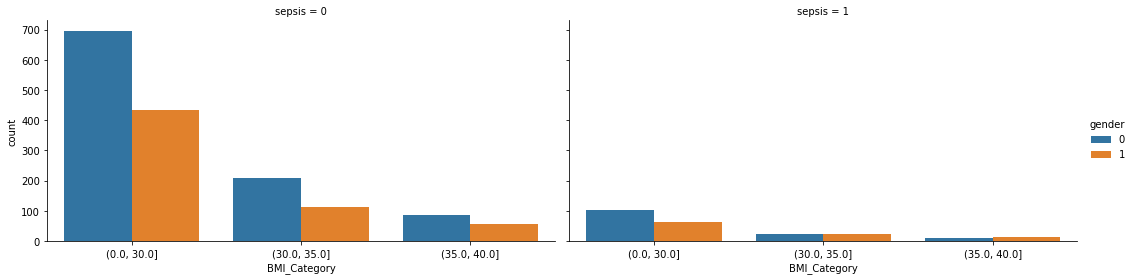

In [38]:
g = sns.catplot(x="BMI_Category", hue="gender", col="sepsis",
                data=stat_df, kind="count",
                height=4, aspect=1.9);

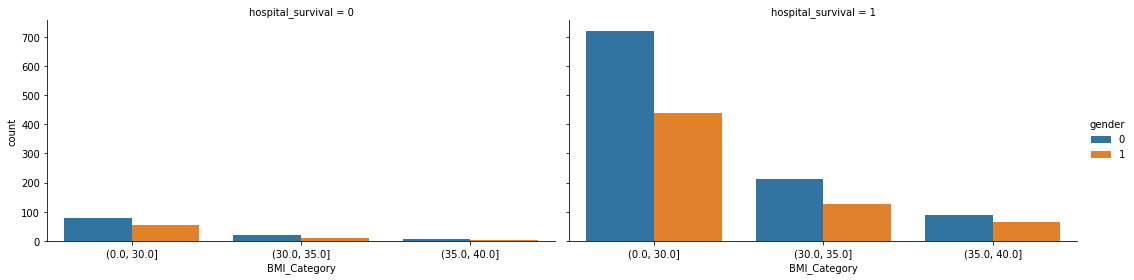

In [39]:
g = sns.catplot(x="BMI_Category", hue="gender", col="hospital_survival",
                data=stat_df, kind="count",
                height=4, aspect=1.9);

# A- Statistical analysis

In [40]:
stat_df.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
0             141765          0     0         0  10.2         36.2   
1             143870          0     0         0  11.7         36.4   
2             144815          0     0         0   7.9         36.7   
3             145427          0     0         0  21.1         36.2   
4             147307          0     0         0   NaN         36.8   

   respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
0             39.0       88.0   139.0   108.0 NaN        37.8        1.04   
1             60.0       40.0   133.0    47.0 NaN        34.1        1.14   
2              6.0      131.0   141.0    61.0 NaN        36.6        0.63   
3             41.0       49.0   141.0    72.0 NaN        40.4        1.05   
4             33.0      115.0     NaN   107.0 NaN         NaN         NaN   

   albumin  pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
0      NaN   NaN   NaN     61.0        NaN     15.0       1   87   
1      NaN   NaN   NaN    140.0        NaN     15.0       0   76   
2      3.6   NaN   NaN     82.0        0.5     15.0       1   34   
3      NaN   NaN   NaN    118.0        NaN     15.0       0   61   
4      NaN   NaN   NaN      NaN        NaN     15.0       1   55   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   

   immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
0                  0          0                     129391   002-1039   
1                  0          0                     131022  002-12289   
2                  0          0                     131736   002-1116   
3                  0          0                     132209  002-12243   
4                  0          0                     133684  002-10241   

   ethnicity                              apacheadmissiondx        BMI  \
0  Caucasian  Rhythm disturbance (atrial, supraventricular)  18.745276   
1  Caucasian                        Endarterectomy, carotid  27.788734   
2  Caucasian          Overdose, other toxin, poison or drug  20.217741   
3  Caucasian            GI perforation/rupture, surgery for  29.007201   
4  Caucasian                        Endarterectomy, carotid  29.226505   

   hospital_survival  sepsis age_bins BMI_Category  
0                  1       0      NaN  (0.0, 30.0]  
1                  1       0  70 - 80  (0.0, 30.0]  
2                  1       0  30 - 40  (0.0, 30.0]  
3                  1       0  60 - 70  (0.0, 30.0]  
4                  1       0  50 - 60  (0.0, 30.0]

In [41]:
stat_df.columns

Index(['patientunitstayid', 'intubated', 'vent', 'dialysis', 'wbc',
       'temperature', 'respiratoryrate', 'heartrate', 'sodium', 'meanbp', 'ph',
       'hematocrit', 'creatinine', 'albumin', 'pao2', 'pco2', 'glucose',
       'bilirubin', 'glasgow', 'gender', 'age', 'thrombolytics', 'aids',
       'hepaticfailure', 'lymphoma', 'metastaticcancer', 'leukemia',
       'immunosuppression', 'cirrhosis', 'patienthealthsystemstayid',
       'uniquepid', 'ethnicity', 'apacheadmissiondx', 'BMI',
       'hospital_survival', 'sepsis', 'age_bins', 'BMI_Category'],
      dtype='object')

In [42]:
stat_features=['intubated','vent','dialysis','wbc','temperature','respiratoryrate',
              'heartrate','sodium','meanbp','bilirubin','glasgow','gender','age','thrombolytics',
              'aids','hepaticfailure','lymphoma','metastaticcancer','leukemia','immunosuppression',
              'cirrhosis','BMI','hospital_survival','sepsis']

In [43]:
stat_df[stat_features].head()

intubated  vent  dialysis   wbc  temperature  respiratoryrate  heartrate  \
0          0     0         0  10.2         36.2             39.0       88.0   
1          0     0         0  11.7         36.4             60.0       40.0   
2          0     0         0   7.9         36.7              6.0      131.0   
3          0     0         0  21.1         36.2             41.0       49.0   
4          0     0         0   NaN         36.8             33.0      115.0   

   sodium  meanbp  bilirubin  glasgow  gender  age  thrombolytics  aids  \
0   139.0   108.0        NaN     15.0       1   87              0     0   
1   133.0    47.0        NaN     15.0       0   76              0     0   
2   141.0    61.0        0.5     15.0       1   34              0     0   
3   141.0    72.0        NaN     15.0       0   61              0     0   
4     NaN   107.0        NaN     15.0       1   55              0     0   

   hepaticfailure  lymphoma  metastaticcancer  leukemia  immunosuppression  \
0               0         0                 0         0                  0   
1               0         0                 0         0                  0   
2               0         0                 0         0                  0   
3               0         0                 0         0                  0   
4               0         0                 0         0                  0   

   cirrhosis        BMI  hospital_survival  sepsis  
0          0  18.745276                  1       0  
1          0  27.788734                  1       0  
2          0  20.217741                  1       0  
3          0  29.007201                  1       0  
4          0  29.226505                  1       0

In [44]:
stat_df[stat_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   intubated          2098 non-null   int64  
 1   vent               2098 non-null   int64  
 2   dialysis           2098 non-null   int64  
 3   wbc                1449 non-null   float64
 4   temperature        1901 non-null   float64
 5   respiratoryrate    2051 non-null   float64
 6   heartrate          2066 non-null   float64
 7   sodium             1581 non-null   float64
 8   meanbp             2049 non-null   float64
 9   bilirubin          726 non-null    float64
 10  glasgow            2009 non-null   float64
 11  gender             2098 non-null   int64  
 12  age                2098 non-null   int64  
 13  thrombolytics      2098 non-null   int64  
 14  aids               2098 non-null   int64  
 15  hepaticfailure     2098 non-null   int64  
 16  lymphoma           2098 

###### Correlation between numerical variables

In [45]:
stat_df['BMI']

0       18.745276
1       27.788734
2       20.217741
3       29.007201
4       29.226505
          ...    
2197    30.576322
2200    49.343294
2201    40.173550
2203    21.605145
2204    24.898144
Name: BMI, Length: 2098, dtype: float64

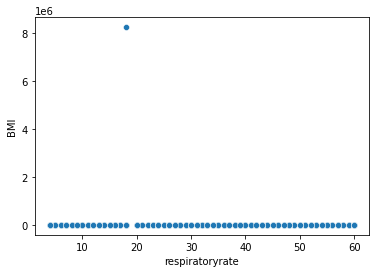

In [46]:
# heartrate vs BMI
sns.scatterplot(stat_df['respiratoryrate'], round(stat_df['BMI'],2))
plt.show()

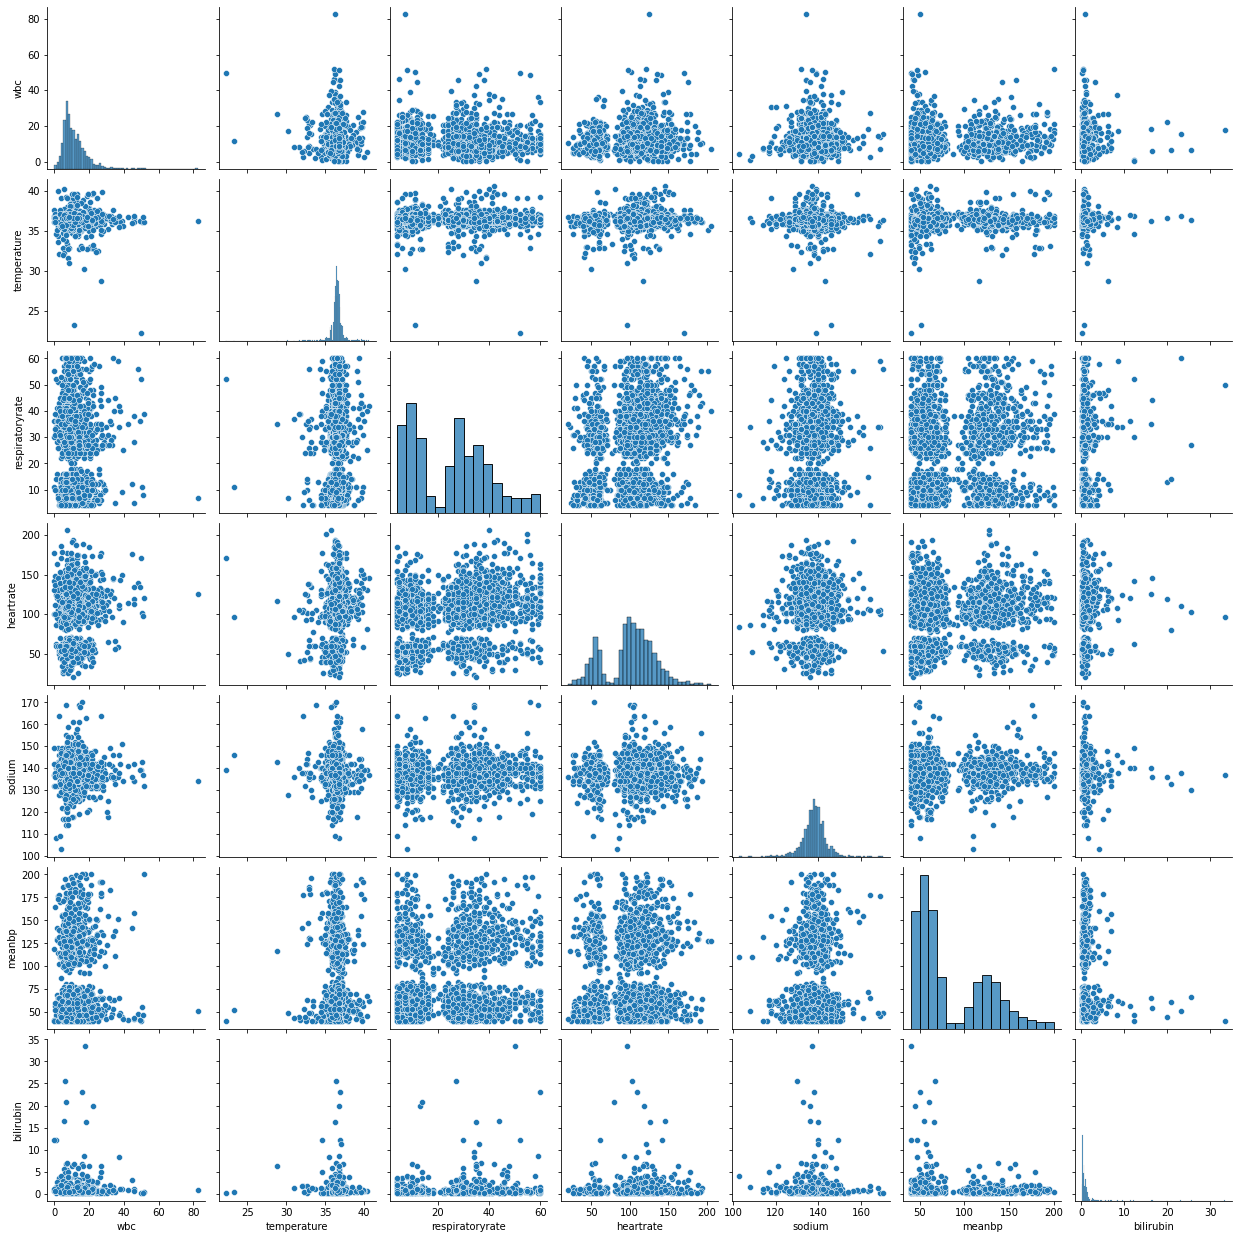

In [47]:
check_correlation=['wbc','temperature','respiratoryrate','heartrate','sodium','meanbp','bilirubin'] # ,'BMI'
sns.pairplot(stat_df[check_correlation])
plt.show()

wbc  temperature  respiratoryrate  heartrate    sodium  \
wbc              1.000000    -0.062042         0.025560   0.165436 -0.017074   
temperature     -0.062042     1.000000         0.028580   0.080545 -0.038792   
respiratoryrate  0.025560     0.028580         1.000000   0.244801  0.035504   
heartrate        0.165436     0.080545         0.244801   1.000000  0.022061   
sodium          -0.017074    -0.038792         0.035504   0.022061  1.000000   
meanbp           0.017833     0.013051         0.122929   0.021188  0.064515   
bilirubin        0.026466    -0.018463         0.134823   0.064818 -0.057481   
BMI              0.007312     0.010634        -0.010728   0.005447 -0.000864   

                   meanbp  bilirubin       BMI  
wbc              0.017833   0.026466  0.007312  
temperature      0.013051  -0.018463  0.010634  
respiratoryrate  0.122929   0.134823 -0.010728  
heartrate        0.021188   0.064818  0.005447  
sodium           0.064515  -0.057481 -0.000864  
meanbp           1.000000  -0.097760 -0.021135  
bilirubin       -0.097760   1.000000  0.032990  
BMI             -0.021135   0.032990  1.000000

<AxesSubplot:>

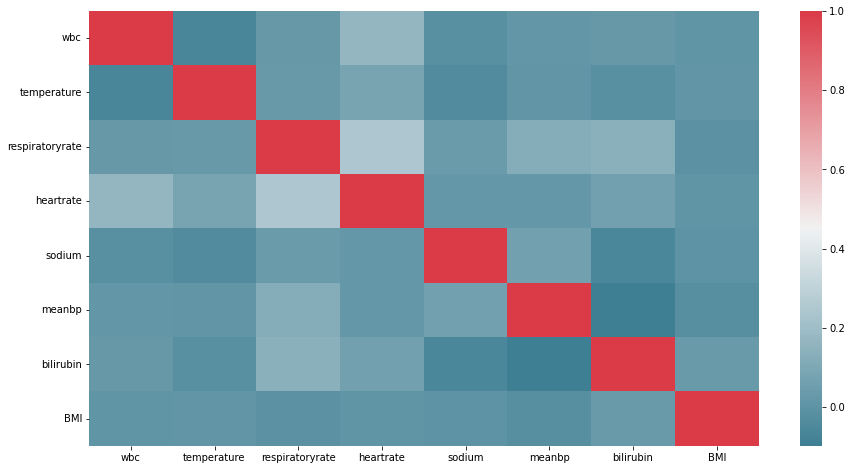

In [48]:
# Calculate the Pearson Correlation Coefficient between all features
feature_bmi=['wbc','temperature','respiratoryrate','heartrate','sodium','meanbp','bilirubin','BMI']
corr_df = stat_df[feature_bmi].corr(method="pearson") 
display(corr_df)
plt.figure(figsize=(15,8))
sns.heatmap(corr_df, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)

In [49]:
#Corrlelations with Multivariate Features using a simple Linear Regression model
#['wbc','temperature','respiratoryrate','heartrate','sodium','meanbp','bilirubin','BMI']
#stat_df

### Is there a relationship between different Age ranges and experiencing sepsis (Probability) ?

In [50]:
stat_df.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
0             141765          0     0         0  10.2         36.2   
1             143870          0     0         0  11.7         36.4   
2             144815          0     0         0   7.9         36.7   
3             145427          0     0         0  21.1         36.2   
4             147307          0     0         0   NaN         36.8   

   respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
0             39.0       88.0   139.0   108.0 NaN        37.8        1.04   
1             60.0       40.0   133.0    47.0 NaN        34.1        1.14   
2              6.0      131.0   141.0    61.0 NaN        36.6        0.63   
3             41.0       49.0   141.0    72.0 NaN        40.4        1.05   
4             33.0      115.0     NaN   107.0 NaN         NaN         NaN   

   albumin  pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
0      NaN   NaN   NaN     61.0        NaN     15.0       1   87   
1      NaN   NaN   NaN    140.0        NaN     15.0       0   76   
2      3.6   NaN   NaN     82.0        0.5     15.0       1   34   
3      NaN   NaN   NaN    118.0        NaN     15.0       0   61   
4      NaN   NaN   NaN      NaN        NaN     15.0       1   55   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   

   immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
0                  0          0                     129391   002-1039   
1                  0          0                     131022  002-12289   
2                  0          0                     131736   002-1116   
3                  0          0                     132209  002-12243   
4                  0          0                     133684  002-10241   

   ethnicity                              apacheadmissiondx        BMI  \
0  Caucasian  Rhythm disturbance (atrial, supraventricular)  18.745276   
1  Caucasian                        Endarterectomy, carotid  27.788734   
2  Caucasian          Overdose, other toxin, poison or drug  20.217741   
3  Caucasian            GI perforation/rupture, surgery for  29.007201   
4  Caucasian                        Endarterectomy, carotid  29.226505   

   hospital_survival  sepsis age_bins BMI_Category  
0                  1       0      NaN  (0.0, 30.0]  
1                  1       0  70 - 80  (0.0, 30.0]  
2                  1       0  30 - 40  (0.0, 30.0]  
3                  1       0  60 - 70  (0.0, 30.0]  
4                  1       0  50 - 60  (0.0, 30.0]

- Create Age categories using conditional logic with dataframe columns

In [51]:
#cat_bins =[0.0, 45.0, 55.0, 65.0, 100]
df1 = stat_df[(stat_df['age'] >= 0) & (stat_df['age'] < 45)]
df1.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
2              144815          0     0         0   7.9         36.7   
6              148611          0     0         0   7.3         36.2   
7              149433          0     0         0   NaN          NaN   
10             151867          0     0         0  12.8         37.1   
12             152954          0     0         0  11.4         36.8   

    respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
2               6.0      131.0   141.0    61.0 NaN        36.6        0.63   
6              45.0      105.0   142.0   108.0 NaN        47.5        0.82   
7               NaN       98.0     NaN     NaN NaN         NaN         NaN   
10             34.0      100.0   136.0   102.0 NaN        40.2        1.07   
12             59.0      113.0   137.0   117.0 NaN        29.3        0.70   

    albumin  pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
2       3.6   NaN   NaN     82.0        0.5     15.0       1   34   
6       NaN   NaN   NaN    112.0        NaN     15.0       0   28   
7       NaN   NaN   NaN      NaN        NaN      NaN       1   34   
10      NaN   NaN   NaN    113.0        NaN     15.0       0   44   
12      2.4   NaN   NaN    100.0        0.4     15.0       1   41   

    thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
2               0     0               0         0                 0         0   
6               0     0               0         0                 0         0   
7               0     0               0         0                 0         0   
10              0     0               0         0                 0         0   
12              0     0               0         0                 0         0   

    immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
2                   0          0                     131736   002-1116   
6                   0          0                     134686  002-10736   
7                   0          0                     135332  002-11375   
10                  0          0                     137216  002-10323   
12                  0          0                     138053  002-10393   

    ethnicity                      apacheadmissiondx        BMI  \
2   Caucasian  Overdose, other toxin, poison or drug  20.217741   
6   Caucasian  Overdose, other toxin, poison or drug  27.441969   
7   Caucasian                                    NaN  22.268684   
10  Caucasian    GI perforation/rupture, surgery for        NaN   
12  Caucasian           Respiratory - medical, other  27.961850   

    hospital_survival  sepsis age_bins BMI_Category  
2                   1       0  30 - 40  (0.0, 30.0]  
6                   1       0  20 - 30  (0.0, 30.0]  
7                   1       0  30 - 40  (0.0, 30.0]  
10                  1       0  40 - 50          NaN  
12                  1       0  40 - 50  (0.0, 30.0]

In [52]:
df2 = stat_df[(stat_df['age'] >= 45) & (stat_df['age'] < 55)]
df2.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
16             156906          0     0         0  15.1         36.4   
28             163137          0     0         0   7.3         36.8   
31             165325          0     0         0   NaN         36.5   
32             165753          0     0         0   NaN          NaN   
37             166864          0     0         0   5.3         36.7   

    respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
16             24.0       96.0     NaN   140.0 NaN        39.4        0.80   
28             46.0      132.0   137.0   104.0 NaN        28.4        1.37   
31             14.0       98.0     NaN     NaN NaN         NaN         NaN   
32              NaN        NaN     NaN     NaN NaN         NaN         NaN   
37             47.0      126.0   140.0   130.0 NaN        38.1        0.72   

    albumin  pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
16      NaN   NaN   NaN      NaN        NaN     15.0       1   52   
28      1.7   NaN   NaN     90.0        5.4     15.0       1   47   
31      NaN   NaN   NaN      NaN        NaN      NaN       0   46   
32      NaN   NaN   NaN      NaN        NaN      NaN       0   49   
37      3.1   NaN   NaN     85.0        1.2     14.0       0   51   

    thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
16              0     0               0         0                 0         0   
28              0     0               0         0                 0         0   
31              0     0               0         0                 0         0   
32              0     0               0         0                 0         0   
37              0     0               0         0                 0         0   

    immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
16                  0          0                     141090  002-10547   
28                  0          0                     145878  002-10157   
31                  0          0                     147582  002-10759   
32                  0          0                     147932  002-10750   
37                  0          0                     148791  002-10672   

    ethnicity     apacheadmissiondx        BMI  hospital_survival  sepsis  \
16  Caucasian  Emphysema/bronchitis  45.000000                  1       0   
28  Caucasian       Drug withdrawal  31.284756                  1       0   
31  Caucasian                   NaN        NaN                  1       0   
32  Caucasian                   NaN        NaN                  1       0   
37  Caucasian       Drug withdrawal  23.067672                  1       0   

   age_bins  BMI_Category  
16  50 - 60           NaN  
28  40 - 50  (30.0, 35.0]  
31  40 - 50           NaN  
32  40 - 50           NaN  
37  50 - 60   (0.0, 30.0]

In [53]:
df3 = stat_df[(stat_df['age'] >= 55) & (stat_df['age'] < 65)]
df3.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
3             145427          0     0         0  21.1         36.2   
4             147307          0     0         0   NaN         36.8   
5             147784          1     0         0  12.6         36.0   
8             149713          0     0         0   9.9         36.3   
9             151179          0     0         0  49.8         22.2   

   respiratoryrate  heartrate  sodium  meanbp    ph  hematocrit  creatinine  \
3             41.0       49.0   141.0    72.0   NaN        40.4        1.05   
4             33.0      115.0     NaN   107.0   NaN         NaN         NaN   
5             53.0      109.0   142.0   130.0  7.38        40.9        0.54   
8             54.0       94.0   133.0    65.0   NaN        38.7        0.61   
9             52.0      171.0   139.0    40.0  7.23        37.7        3.02   

   albumin  pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
3      NaN   NaN   NaN    118.0        NaN     15.0       0   61   
4      NaN   NaN   NaN      NaN        NaN     15.0       1   55   
5      2.8  76.0  81.0    151.0        0.7     13.0       1   60   
8      3.8   NaN   NaN     97.0        0.5     14.0       1   61   
9      1.3  91.0  26.0     58.0        0.2     15.0       1   59   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   
5              0     0               0         0                 0         0   
8              0     0               0         0                 0         0   
9              0     0               0         0                 1         0   

   immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
3                  0          0                     132209  002-12243   
4                  0          0                     133684  002-10241   
5                  0          0                     134042  002-10424   
8                  0          0                     135537  002-11569   
9                  0          0                     136669  002-10079   

   ethnicity                                  apacheadmissiondx        BMI  \
3  Caucasian                GI perforation/rupture, surgery for  29.007201   
4  Caucasian                            Endarterectomy, carotid  29.226505   
5   Hispanic  Coma/change in level of consciousness (for hep...  39.843278   
8  Caucasian                  Infarction, acute myocardial (MI)  23.582766   
9  Caucasian                      Sepsis, cutaneous/soft tissue        NaN   

   hospital_survival  sepsis age_bins  BMI_Category  
3                  1       0  60 - 70   (0.0, 30.0]  
4                  1       0  50 - 60   (0.0, 30.0]  
5                  1       0  50 - 60  (35.0, 40.0]  
8                  1       0  60 - 70   (0.0, 30.0]  
9                  0       1  50 - 60           NaN

In [54]:
df4 = stat_df[(stat_df['age'] >= 65) & (stat_df['age'] <= 100)]
df4.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
0              141765          0     0         0  10.2         36.2   
1              143870          0     0         0  11.7         36.4   
11             151900          0     0         0   7.3         36.5   
15             156308          0     1         0   6.1         35.8   
18             157427          0     0         0   NaN         36.2   

    respiratoryrate  heartrate  sodium  meanbp    ph  hematocrit  creatinine  \
0              39.0       88.0   139.0   108.0   NaN        37.8        1.04   
1              60.0       40.0   133.0    47.0   NaN        34.1        1.14   
11             10.0      120.0   135.0   174.0  7.42        22.4        0.84   
15             45.0       98.0   147.0    61.0   NaN        27.0        1.30   
18             17.0      108.0   138.0    52.0   NaN         NaN        1.32   

    albumin   pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
0       NaN    NaN   NaN     61.0        NaN     15.0       1   87   
1       NaN    NaN   NaN    140.0        NaN     15.0       0   76   
11      NaN  120.0  35.0     90.0        NaN     11.0       1   66   
15      2.3    NaN   NaN    446.0        0.3     15.0       0   87   
18      NaN    NaN   NaN     76.0        NaN     15.0       0   73   

    thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0               0     0               0         0                 0         0   
1               0     0               0         0                 0         0   
11              0     0               0         0                 0         0   
15              0     0               0         0                 0         0   
18              0     0               0         0                 0         0   

    immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
0                   0          0                     129391   002-1039   
1                   0          0                     131022  002-12289   
11                  1          0                     137239  002-10052   
15                  1          0                     140641  002-11027   
18                  0          0                     141489  002-12209   

    ethnicity                              apacheadmissiondx        BMI  \
0   Caucasian  Rhythm disturbance (atrial, supraventricular)  18.745276   
1   Caucasian                        Endarterectomy, carotid  27.788734   
11  Caucasian                              Sepsis, pulmonary  31.843851   
15  Caucasian                              Sepsis, pulmonary  28.894941   
18  Caucasian  Rhythm disturbance (atrial, supraventricular)  26.516476   

    hospital_survival  sepsis age_bins  BMI_Category  
0                   1       0      NaN   (0.0, 30.0]  
1                   1       0  70 - 80   (0.0, 30.0]  
11                  1       1  60 - 70  (30.0, 35.0]  
15                  1       1      NaN   (0.0, 30.0]  
18                  1       0  70 - 80   (0.0, 30.0]

In [55]:
df1grp= df1.groupby("sepsis")['age'].describe()
df1grp

count       mean       std   min   25%   50%   75%   max
sepsis                                                          
0       342.0  31.728070  8.077649   0.0  26.0  33.0  39.0  44.0
1        27.0  37.185185  6.725594  19.0  34.0  39.0  42.0  44.0

In [56]:
# probability of having sepsis by Age category 1
prob_Age_0_45 = df1grp.iloc[1, 0]/(df1grp.iloc[0, 0] + df1grp.iloc[1, 0])
print(prob_Age_0_45)

0.07317073170731707


In [57]:
# category 2
df2grp = df2.groupby("sepsis")['age'].describe()
df2grp

count       mean       std   min   25%   50%   75%   max
sepsis                                                          
0       219.0  50.369863  2.766975  45.0  48.0  51.0  53.0  54.0
1        23.0  50.956522  2.883783  46.0  48.0  52.0  54.0  54.0

In [58]:
# probability of getting glucose treatment by Age category 2
prob_Age_45_55 = df2grp.iloc[1, 0]/(df2grp.iloc[0, 0] + df2grp.iloc[1, 0])
print(prob_Age_45_55)

0.09504132231404959


In [59]:
df3grp = df3.groupby("sepsis")['age'].describe()
df3grp

count       mean       std   min   25%   50%   75%   max
sepsis                                                          
0       407.0  59.783784  2.804365  55.0  57.0  61.0  62.0  64.0
1        81.0  59.629630  2.812670  55.0  57.0  60.0  61.0  64.0

In [60]:
# probability of getting glucose treatment by Age category 3
prob_Age_55_65 = df3grp.iloc[1, 0]/(df3grp.iloc[0, 0] + df3grp.iloc[1, 0])
print(prob_Age_55_65)

0.16598360655737704


In [61]:
df4grp = df4.groupby("sepsis")['age'].describe()
df4grp

count       mean       std   min   25%   50%   75%   max
sepsis                                                          
0       857.0  75.770128  6.751403  65.0  70.0  75.0  81.0  89.0
1       142.0  75.704225  6.678842  65.0  70.0  76.0  81.0  89.0

In [62]:
# probability of getting glucose treatment by Age category 4
prob_Age_65_inf = df4grp.iloc[1, 0]/(df4grp.iloc[0, 0] + df4grp.iloc[1, 0])
print(prob_Age_65_inf)

0.14214214214214213


In [63]:
print('prob age grp 0-45 =', prob_Age_0_45)
print('prob age grp 45-55 =',prob_Age_45_55)
print('prob age grp 55-65 =',prob_Age_55_65)
print('prob age grp 65-inf =',prob_Age_65_inf)

prob age grp 0-45 = 0.07317073170731707
prob age grp 45-55 = 0.09504132231404959
prob age grp 55-65 = 0.16598360655737704
prob age grp 65-inf = 0.14214214214214213


##### Is there a significant relationship between Age and having sepsis ?

In [64]:
from scipy import stats
import researchpy as rp
des, res = rp.ttest(stat_df['age'], stat_df['sepsis'],equal_variances= False)
print(des, res)

   Variable       N       Mean         SD        SE  95% Conf.   Interval
0       age  2098.0  61.441849  17.303146  0.377766  60.701015  62.182684
1    sepsis  2098.0   0.130124   0.336520  0.007347   0.115716   0.144532
2  combined  4196.0  30.785987  33.011003  0.509614  29.786874  31.785099                  Welch's t-test    results
0  Difference (age - sepsis) =     61.3117
1         Degrees of freedom =   2098.5879
2                          t =    162.2703
3      Two side test p value =      0.0000
4     Difference < 0 p value =      1.0000
5     Difference > 0 p value =      0.0000
6                  Cohen's d =      5.0102
7                  Hedge's g =      5.0093
8              Glass's delta =      3.5434
9                Pearson's r =      0.9624


In [65]:
stats.ttest_ind(stat_df['age'], stat_df['sepsis'], equal_var = False)

Ttest_indResult(statistic=162.27031955035787, pvalue=0.0)

###### Is there a significant relationship between BMI and having sepsis

In [66]:
des, res = rp.ttest(stat_df['BMI'], stat_df['sepsis'],equal_variances= False)
print(des, res)

   Variable       N         Mean             SD           SE    95% Conf.  \
0       BMI  2009.0  4129.297381  183689.411708  4098.209492 -3907.890160   
1    sepsis  2098.0     0.130124       0.336520     0.007347     0.115716   
2  combined  4107.0  2019.973567  128473.210685  2004.703859 -1910.332364   

       Interval  
0  12166.484923  
1      0.144532  
2   5950.279498                    Welch's t-test    results
0  Difference (BMI - sepsis) =   4129.1673
1         Degrees of freedom =   2008.0000
2                          t =      1.0076
3      Two side test p value =      0.3138
4     Difference < 0 p value =      0.8431
5     Difference > 0 p value =      0.1569
6                  Cohen's d =      0.0321
7                  Hedge's g =      0.0321
8              Glass's delta =      0.0225
9                Pearson's r =      0.0225


In [67]:
stats.ttest_ind(stat_df['BMI'], stat_df['sepsis'], equal_var = False)

Ttest_indResult(statistic=nan, pvalue=nan)

## Logistic Regression - univariate - for having sepsis

Documentation link 
- https://www.statsmodels.org/stable/index.html

###### Method 1 : Generalized linear model 

In [68]:
# we will try a generalized linear model at first to look at relationship between sepsis and gender
# this is an example of a univariate logistic regression
# Gender vs sepsis
import statsmodels.api as sm
model_gender = sm.GLM.from_formula("sepsis ~ gender", family = sm.families.Binomial(), data=stat_df)

result_gender = model_gender.fit()
result_gender.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                 2098
Model:                            GLM   Df Residuals:                     2096
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -808.15
Date:                Sat, 22 Jan 2022   Deviance:                       1616.3
Time:                        18:38:03   Pearson chi2:                 2.10e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.002839
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0351      0.088    -23.205      0.000      -2.207      -1.863
gender         0.3203      0.131      2.453      0.014       0.064       0.576
==============================================================================
"""

###### Looking the p-value AND Odds Ratio using the Table 2x2 contingency table method

In [69]:
# gender and sepsis
tab = pd.crosstab(stat_df.gender, stat_df.sepsis)
table = sm.stats.Table2x2(tab)
table.summary(method='normal')

<class 'statsmodels.iolib.table.SimpleTable'>

In [70]:
model_stats_gender = pd.DataFrame(np.exp(result_gender.params), columns= ['OddsRatio'])
model_stats_gender['P>|z|']= result_gender.pvalues
model_stats_gender[['2.5%', '97.5%']] = np.exp(result_gender.conf_int())
model_stats_gender

OddsRatio          P>|z|      2.5%     97.5%
Intercept   0.130667  4.069864e-119  0.110030  0.155173
gender      1.377551   1.418441e-02  1.066448  1.779409

In [71]:
# Age vs sepsis
model_gender = sm.GLM.from_formula("sepsis ~ age", family = sm.families.Binomial(), data=stat_df)

result = model_gender.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                 2098
Model:                            GLM   Df Residuals:                     2096
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -804.03
Date:                Sat, 22 Jan 2022   Deviance:                       1608.1
Time:                        18:38:03   Pearson chi2:                 2.08e+03
No. Iterations:                     5   Pseudo R-squ. (CS):           0.006745
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8343      0.269    -10.532      0.000      -3.362      -2.307
age            0.0148      0.004      3.666      0.000       0.007       0.023
==============================================================================
"""

#### Method 2 : Using the function Logit

In [72]:
import statsmodels.formula.api as smf
model_age= smf.logit(formula="sepsis ~ age", data= stat_df).fit()
model_age.summary()

Optimization terminated successfully.
         Current function value: 0.383238
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                 2098
Model:                          Logit   Df Residuals:                     2096
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                0.008752
Time:                        18:38:03   Log-Likelihood:                -804.03
converged:                       True   LL-Null:                       -811.13
Covariance Type:            nonrobust   LLR p-value:                 0.0001645
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8343      0.269    -10.532      0.000      -3.362      -2.307
age            0.0148      0.004      3.666      0.000       0.007       0.023
==============================================================================
"""

###### Odds Ratio (Age vs Sepsis)

In [73]:
model_stats_age = pd.DataFrame(np.exp(model_age.params), columns= ['OddsRatio'])
model_stats_age['P>|z|']= model_age.pvalues
model_stats_age

OddsRatio         P>|z|
Intercept   0.058757  6.134292e-26
age         1.014936  2.465577e-04

In [74]:
# BMI and sepsis 
model_bmi= smf.logit(formula="sepsis ~ BMI ", data= stat_df).fit()
model_bmi.summary()

Optimization terminated successfully.
         Current function value: 0.393570
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                 2009
Model:                          Logit   Df Residuals:                     2007
Method:                           MLE   Df Model:                            1
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:               0.0004031
Time:                        18:38:03   Log-Likelihood:                -790.68
converged:                       True   LL-Null:                       -791.00
Covariance Type:            nonrobust   LLR p-value:                    0.4245
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8332      0.106    -17.310      0.000      -2.041      -1.626
BMI           -0.0011      0.003     -0.390      0.697      -0.007       0.004
==============================================================================
"""

In [75]:
model_stats_bmi = pd.DataFrame(np.exp(model_bmi.params), columns= ['OddsRatio'])
model_stats_bmi['P>|z|']= model_bmi.pvalues
model_stats_bmi

OddsRatio         P>|z|
Intercept   0.159893  3.971908e-67
BMI         0.998893  6.966164e-01

In [76]:
# all run against sepsis individually (Univariate Logisitic Regression)
print(model_stats_gender)
print(model_stats_age)
print(model_stats_bmi)

           OddsRatio          P>|z|      2.5%     97.5%
Intercept   0.130667  4.069864e-119  0.110030  0.155173
gender      1.377551   1.418441e-02  1.066448  1.779409
           OddsRatio         P>|z|
Intercept   0.058757  6.134292e-26
age         1.014936  2.465577e-04
           OddsRatio         P>|z|
Intercept   0.159893  3.971908e-67
BMI         0.998893  6.966164e-01


## Logistic Regression statistical analysis - for having sepsis

###### Method 1  - Generalized Linear Model Regression (Method IRLS)

In [77]:
model_logreg_muti = sm.GLM.from_formula("sepsis ~ age + gender + BMI ", family = sm.families.Binomial(), data=stat_df)
result_logreg_multi = model_logreg_muti.fit()
result_logreg_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                 2009
Model:                            GLM   Df Residuals:                     2005
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 22 Jan 2022   Deviance:                       1562.0
Time:                        18:38:03   Pearson chi2:                 2.00e+03
No. Iterations:                    16   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8962      0.292     -9.923      0.000      -3.468      -2.324
age            0.0149      0.004      3.632      0.000       0.007       0.023
gender         0.2946      0.132      2.224      0.026       0.035       0.554
BMI           -0.0011      0.003     -0.360      0.719      -0.007       0.005
==============================================================================
"""

In [78]:
# Odds and confidence level
model_stats_logreg_multi = pd.DataFrame(np.exp(result_logreg_multi.params), columns= ['OddsRatio'])
model_stats_logreg_multi['P>|z|']= result_logreg_multi.pvalues
model_stats_logreg_multi[['lower 95% CI', 'upper 95% CI']] = np.exp(result_logreg_multi.conf_int())
model_stats_logreg_multi

OddsRatio         P>|z|  lower 95% CI  upper 95% CI
Intercept   0.055230  3.303544e-23      0.031170      0.097862
age         1.014982  2.810756e-04      1.006870      1.023160
gender      1.342591  2.617941e-02      1.035539      1.740689
BMI         0.998930  7.186014e-01      0.993131      1.004763

##### Method 2 - Logit Regression (Method MLE)

In [79]:
import statsmodels.formula.api as smf
model_logreg_logit= smf.logit(formula="sepsis ~ age + gender + BMI ", data= stat_df).fit()
model_logreg_logit.summary()

Optimization terminated successfully.
         Current function value: 0.388753
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                 2009
Model:                          Logit   Df Residuals:                     2005
Method:                           MLE   Df Model:                            3
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                 0.01264
Time:                        18:38:03   Log-Likelihood:                -781.01
converged:                       True   LL-Null:                       -791.00
Covariance Type:            nonrobust   LLR p-value:                 0.0001704
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8962      0.292     -9.923      0.000      -3.468      -2.324
age            0.0149      0.004      3.632      0.000       0.007       0.023
gender         0.2946      0.132      2.224      0.026       0.035       0.554
BMI           -0.0011      0.003     -0.360      0.719      -0.007       0.005
==============================================================================
"""

In [80]:
# Odds and confidence level
model_stats_logreg_logit = pd.DataFrame(np.exp(model_logreg_logit.params), columns= ['OddsRatio'])
model_stats_logreg_logit['P>|z|']= model_logreg_logit.pvalues
model_stats_logreg_logit[['lower 95% CI', 'upper 95% CI']] = np.exp(model_logreg_logit.conf_int())
model_stats_logreg_logit

OddsRatio         P>|z|  lower 95% CI  upper 95% CI
Intercept   0.055230  3.303870e-23      0.031170      0.097862
age         1.014982  2.810756e-04      1.006870      1.023160
gender      1.342591  2.617941e-02      1.035539      1.740689
BMI         0.998930  7.186045e-01      0.993131      1.004763

##### Logistic Regression - multivariate  with all independante varaible for having sepsis

In [81]:
stat_df.head()

patientunitstayid  intubated  vent  dialysis   wbc  temperature  \
0             141765          0     0         0  10.2         36.2   
1             143870          0     0         0  11.7         36.4   
2             144815          0     0         0   7.9         36.7   
3             145427          0     0         0  21.1         36.2   
4             147307          0     0         0   NaN         36.8   

   respiratoryrate  heartrate  sodium  meanbp  ph  hematocrit  creatinine  \
0             39.0       88.0   139.0   108.0 NaN        37.8        1.04   
1             60.0       40.0   133.0    47.0 NaN        34.1        1.14   
2              6.0      131.0   141.0    61.0 NaN        36.6        0.63   
3             41.0       49.0   141.0    72.0 NaN        40.4        1.05   
4             33.0      115.0     NaN   107.0 NaN         NaN         NaN   

   albumin  pao2  pco2  glucose  bilirubin  glasgow  gender  age  \
0      NaN   NaN   NaN     61.0        NaN     15.0       1   87   
1      NaN   NaN   NaN    140.0        NaN     15.0       0   76   
2      3.6   NaN   NaN     82.0        0.5     15.0       1   34   
3      NaN   NaN   NaN    118.0        NaN     15.0       0   61   
4      NaN   NaN   NaN      NaN        NaN     15.0       1   55   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   

   immunosuppression  cirrhosis  patienthealthsystemstayid  uniquepid  \
0                  0          0                     129391   002-1039   
1                  0          0                     131022  002-12289   
2                  0          0                     131736   002-1116   
3                  0          0                     132209  002-12243   
4                  0          0                     133684  002-10241   

   ethnicity                              apacheadmissiondx        BMI  \
0  Caucasian  Rhythm disturbance (atrial, supraventricular)  18.745276   
1  Caucasian                        Endarterectomy, carotid  27.788734   
2  Caucasian          Overdose, other toxin, poison or drug  20.217741   
3  Caucasian            GI perforation/rupture, surgery for  29.007201   
4  Caucasian                        Endarterectomy, carotid  29.226505   

   hospital_survival  sepsis age_bins BMI_Category  
0                  1       0      NaN  (0.0, 30.0]  
1                  1       0  70 - 80  (0.0, 30.0]  
2                  1       0  30 - 40  (0.0, 30.0]  
3                  1       0  60 - 70  (0.0, 30.0]  
4                  1       0  50 - 60  (0.0, 30.0]

In [82]:
stat_df.describe()

patientunitstayid    intubated         vent     dialysis          wbc  \
count       2.098000e+03  2098.000000  2098.000000  2098.000000  1449.000000   
mean        1.744674e+06     0.104385     0.200191     0.030982    11.692505   
std         1.017084e+06     0.305832     0.400238     0.173310     7.103142   
min         1.417650e+05     0.000000     0.000000     0.000000     0.100000   
25%         9.114130e+05     0.000000     0.000000     0.000000     7.200000   
50%         1.685607e+06     0.000000     0.000000     0.000000     9.900000   
75%         2.735352e+06     0.000000     0.000000     0.000000    14.580000   
max         3.353113e+06     1.000000     1.000000     1.000000    82.500000   

       temperature  respiratoryrate    heartrate       sodium       meanbp  \
count  1901.000000      2051.000000  2066.000000  1581.000000  2049.000000   
mean     36.431341        25.089712   100.339303   137.942062    84.678868   
std       0.918283        14.876065    31.554581     5.904166    39.971344   
min      22.200000         4.000000    20.000000   103.000000    40.000000   
25%      36.200000        11.000000    86.000000   135.000000    53.000000   
50%      36.500000        27.000000   104.000000   138.000000    65.000000   
75%      36.770000        35.000000   121.000000   141.000000   120.000000   
max      40.600000        60.000000   206.000000   170.000000   200.000000   

               ph   hematocrit   creatinine     albumin        pao2  \
count  379.000000  1495.000000  1576.000000  814.000000  379.000000   
mean     7.364032    33.316722     1.500752    2.884152  125.992876   
std      0.104143     6.791202     1.630401    0.688855   80.614009   
min      6.950000    13.400000     0.100000    1.200000   27.000000   
25%      7.310000    28.350000     0.737500    2.400000   73.000000   
50%      7.380000    33.600000     1.000000    2.900000  102.000000   
75%      7.430000    38.200000     1.590000    3.400000  153.500000   
max      7.630000    55.700000    20.200000    5.100000  508.000000   

             pco2      glucose   bilirubin      glasgow       gender  \
count  379.000000  1732.000000  726.000000  2009.000000  2098.000000   
mean    41.935884   165.308314    1.230771    13.410652     0.393708   
std     12.528101   103.044710    2.528511     3.108609     0.488688   
min     10.000000    10.000000    0.100000     3.000000     0.000000   
25%     34.000000    97.000000    0.400000    14.000000     0.000000   
50%     40.300000   130.000000    0.600000    15.000000     0.000000   
75%     47.700000   201.000000    1.100000    15.000000     1.000000   
max     94.000000   975.000000   33.400000    15.000000     1.000000   

               age  thrombolytics    aids  hepaticfailure     lymphoma  \
count  2098.000000    2098.000000  2098.0     2098.000000  2098.000000   
mean     61.441849       0.012869     0.0        0.013346     0.006196   
std      17.303146       0.112738     0.0        0.114779     0.078492   
min       0.000000       0.000000     0.0        0.000000     0.000000   
25%      52.000000       0.000000     0.0        0.000000     0.000000   
50%      63.000000       0.000000     0.0        0.000000     0.000000   
75%      75.000000       0.000000     0.0        0.000000     0.000000   
max      89.000000       1.000000     0.0        1.000000     1.000000   

       metastaticcancer     leukemia  immunosuppression    cirrhosis  \
count       2098.000000  2098.000000        2098.000000  2098.000000   
mean           0.020496     0.009056           0.026215     0.014776   
std            0.141722     0.094755           0.159814     0.120684   
min            0.000000     0.000000           0.000000     0.000000   
25%            0.000000     0.000000           0.000000     0.000000   
50%            0.000000     0.000000           0.000000     0.000000   
75%            0.000000     0.000000           0.000000     0.000000   
max            1.000000     1.000000           1.00

- Check NaNs

In [83]:
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2204
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   patientunitstayid          2098 non-null   int64   
 1   intubated                  2098 non-null   int64   
 2   vent                       2098 non-null   int64   
 3   dialysis                   2098 non-null   int64   
 4   wbc                        1449 non-null   float64 
 5   temperature                1901 non-null   float64 
 6   respiratoryrate            2051 non-null   float64 
 7   heartrate                  2066 non-null   float64 
 8   sodium                     1581 non-null   float64 
 9   meanbp                     2049 non-null   float64 
 10  ph                         379 non-null    float64 
 11  hematocrit                 1495 non-null   float64 
 12  creatinine                 1576 non-null   float64 
 13  albumin                    814 no

- NaN imputation helper with Random value imputation Method

In [84]:
# lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=stat_df[feature].dropna().sample(stat_df[feature].isnull().sum())               
    random_sample.index=stat_df[stat_df[feature].isnull()].index
    stat_df.loc[stat_df[feature].isnull(),feature]=random_sample

In [85]:
# Imputation the concerned numerical columns
#Random_value_imputation('wbc')
#Random_value_imputation('temperature')
#Random_value_imputation('respiratoryrate')
#Random_value_imputation('heartrate')
#Random_value_imputation('sodium')
#Random_value_imputation('meanbp')
#Random_value_imputation('hematocrit')
#Random_value_imputation('creatinine')
#Random_value_imputation('albumin')
#Random_value_imputation('pao2')
#Random_value_imputation('pco2')
#Random_value_imputation('glucose')
#Random_value_imputation('bilirubin')

### Imputation by MICE (Multiple Imputation by Chained Equations) Method

Doc : https://medium.com/@WalePhenomenon/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

In [86]:
from fancyimpute import IterativeImputer

In [87]:
mice_stat_features=['wbc','temperature','respiratoryrate','heartrate',
                  'sodium','meanbp','hematocrit','creatinine','albumin',
                  'pao2','pco2','glucose','bilirubin']

In [88]:
stat_df[mice_stat_features].head()

wbc  temperature  respiratoryrate  heartrate  sodium  meanbp  hematocrit  \
0  10.2         36.2             39.0       88.0   139.0   108.0        37.8   
1  11.7         36.4             60.0       40.0   133.0    47.0        34.1   
2   7.9         36.7              6.0      131.0   141.0    61.0        36.6   
3  21.1         36.2             41.0       49.0   141.0    72.0        40.4   
4   NaN         36.8             33.0      115.0     NaN   107.0         NaN   

   creatinine  albumin  pao2  pco2  glucose  bilirubin  
0        1.04      NaN   NaN   NaN     61.0        NaN  
1        1.14      NaN   NaN   NaN    140.0        NaN  
2        0.63      3.6   NaN   NaN     82.0        0.5  
3        1.05      NaN   NaN   NaN    118.0        NaN  
4         NaN      NaN   NaN   NaN      NaN        NaN

In [89]:
stat_df[mice_stat_features].describe()

wbc  temperature  respiratoryrate    heartrate       sodium  \
count  1449.000000  1901.000000      2051.000000  2066.000000  1581.000000   
mean     11.692505    36.431341        25.089712   100.339303   137.942062   
std       7.103142     0.918283        14.876065    31.554581     5.904166   
min       0.100000    22.200000         4.000000    20.000000   103.000000   
25%       7.200000    36.200000        11.000000    86.000000   135.000000   
50%       9.900000    36.500000        27.000000   104.000000   138.000000   
75%      14.580000    36.770000        35.000000   121.000000   141.000000   
max      82.500000    40.600000        60.000000   206.000000   170.000000   

            meanbp   hematocrit   creatinine     albumin        pao2  \
count  2049.000000  1495.000000  1576.000000  814.000000  379.000000   
mean     84.678868    33.316722     1.500752    2.884152  125.992876   
std      39.971344     6.791202     1.630401    0.688855   80.614009   
min      40.000000    13.400000     0.100000    1.200000   27.000000   
25%      53.000000    28.350000     0.737500    2.400000   73.000000   
50%      65.000000    33.600000     1.000000    2.900000  102.000000   
75%     120.000000    38.200000     1.590000    3.400000  153.500000   
max     200.000000    55.700000    20.200000    5.100000  508.000000   

             pco2      glucose   bilirubin  
count  379.000000  1732.000000  726.000000  
mean    41.935884   165.308314    1.230771  
std     12.528101   103.044710    2.528511  
min     10.000000    10.000000    0.100000  
25%     34.000000    97.000000    0.400000  
50%     40.300000   130.000000    0.600000  
75%     47.700000   201.000000    1.100000  
max     94.000000   975.000000   33.400000

In [90]:
mice_imputer=IterativeImputer()
stat_df[mice_stat_features]=mice_imputer.fit_transform(stat_df[mice_stat_features])

In [91]:
stat_df[mice_stat_features]

wbc  temperature  respiratoryrate  heartrate      sodium  meanbp  \
0     10.200000         36.2             39.0       88.0  139.000000   108.0   
1     11.700000         36.4             60.0       40.0  133.000000    47.0   
2      7.900000         36.7              6.0      131.0  141.000000    61.0   
3     21.100000         36.2             41.0       49.0  141.000000    72.0   
4     12.101869         36.8             33.0      115.0  138.125932   107.0   
...         ...          ...              ...        ...         ...     ...   
2197  11.644452         36.1              4.0      114.0  138.157008    54.0   
2200   8.500000         36.8             45.0      141.0  133.000000    54.0   
2201  19.600000         35.7             39.0      113.0  137.000000    62.0   
2203  33.500000         36.5             60.0      146.0  136.000000   133.0   
2204   8.593563         36.3             43.0       47.0  137.000000   129.0   

      hematocrit  creatinine   albumin        pao2       pco2     glucose  \
0      37.800000    1.040000  3.132796  126.771183  44.372360   61.000000   
1      34.100000    1.140000  3.102848  112.359820  44.437857  140.000000   
2      36.600000    0.630000  3.600000  125.537967  42.879074   82.000000   
3      40.400000    1.050000  3.235184  127.963443  44.028543  118.000000   
4      33.862326    1.579883  2.911055  125.705507  41.843400  170.109064   
...          ...         ...       ...         ...        ...         ...   
2197   32.430320    1.319694  2.705537  127.000000  42.100000   83.000000   
2200   26.000000    0.880000  1.500000  104.000000  47.600000  149.000000   
2201   27.000000    1.310000  2.392560  178.000000  25.300000  224.000000   
2203   34.000000    0.970000  3.300000   59.000000  35.300000  102.000000   
2204   37.948987    0.570000  3.600000  133.828979  44.466585   82.000000   

      bilirubin  
0      1.413441  
1      2.029685  
2      0.500000  
3      1.418687  
4      1.267734  
...         ...  
2197   1.249588  
2200   0.400000  
2201   1.822944  
2203   0.800000  
2204   1.300000  

[2098 rows x 13 columns]

In [92]:
stat_df[mice_stat_features].describe()

wbc  temperature  respiratoryrate    heartrate       sodium  \
count  2098.000000  2098.000000      2098.000000  2098.000000  2098.000000   
mean     11.656957    36.430110        25.068996   100.338136   137.940855   
std       5.973963     0.874632        14.712327    31.313443     5.127656   
min       0.100000    22.200000         4.000000    20.000000   103.000000   
25%       8.100000    36.200000        11.000000    87.000000   136.000000   
50%      11.079343    36.434064        27.000000   104.000000   138.000000   
75%      13.408779    36.700000        35.000000   121.000000   140.000000   
max      82.500000    40.600000        60.000000   206.000000   170.000000   

            meanbp   hematocrit   creatinine      albumin         pao2  \
count  2098.000000  2098.000000  2098.000000  2098.000000  2098.000000   
mean     84.698560    33.397899     1.506503     2.897047   126.904408   
std      39.505828     5.834205     1.415759     0.485699    35.582000   
min      40.000000    13.400000     0.100000     1.200000    27.000000   
25%      54.000000    30.300000     0.800000     2.689843   116.681979   
50%      66.000000    33.400000     1.300000     2.903042   126.458655   
75%     120.000000    36.600000     1.594951     3.148978   134.073009   
max     200.000000    55.700000    20.200000     5.100000   508.000000   

              pco2      glucose    bilirubin  
count  2098.000000  2098.000000  2098.000000  
mean     42.027675   164.806490     1.224570  
std       5.564182    93.936216     1.530540  
min      10.000000     0.377150    -1.017876  
25%      41.000000   102.000000     0.687260  
50%      42.358663   149.982031     1.094929  
75%      43.282589   185.927964     1.454581  
max      94.000000   975.000000    33.400000

- Multivariate logistic regression statistical analysis  with all independante varaible for having sepsis

In [93]:
stat_df[mice_stat_features].columns

Index(['wbc', 'temperature', 'respiratoryrate', 'heartrate', 'sodium',
       'meanbp', 'hematocrit', 'creatinine', 'albumin', 'pao2', 'pco2',
       'glucose', 'bilirubin'],
      dtype='object')

##### Statistical Analysis all variables

In [94]:
import statsmodels.formula.api as smf
model_logreg_logit_sepsis= smf.logit(formula="sepsis ~ age + gender + BMI+temperature+respiratoryrate+heartrate+sodium+meanbp+hematocrit+creatinine+albumin+pao2+pco2+glucose+bilirubin", data= stat_df).fit()
model_logreg_logit_sepsis.summary()

Optimization terminated successfully.
         Current function value: 0.350071
         Iterations 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                 2009
Model:                          Logit   Df Residuals:                     1993
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                  0.1109
Time:                        18:38:04   Log-Likelihood:                -703.29
converged:                       True   LL-Null:                       -791.00
Covariance Type:            nonrobust   LLR p-value:                 1.993e-29
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -13.9513      4.067     -3.431      0.001     -21.922      -5.981
age                 0.0156      0.004      3.501      0.000       0.007       0.024
gender              0.2221      0.140      1.584      0.113      -0.053       0.497
BMI                -0.0034      0.004     -0.789      0.430      -0.012       0.005
temperature         0.2904      0.092      3.163      0.002       0.110       0.470
respiratoryrate     0.0172      0.005      3.364      0.001       0.007       0.027
heartrate           0.0095      0.003      3.733      0.000       0.004       0.014
sodium              0.0156      0.013      1.200      0.230      -0.010       0.041
meanbp             -0.0072      0.002     -3.561      0.000      -0.011      -0.003
hematocrit          0.0090      0.015      0.614      0.539      -0.020       0.038
creatinine          0.1342      0.040      3.335      0.001       0.055       0.213
albumin            -1.0023      0.183     -5.469      0.000      -1.361      -0.643
pao2               -0.0013      0.002     -0.596      0.551      -0.006       0.003
pco2                0.0016      0.012      0.126      0.900      -0.023       0.026
glucose            -0.0011      0.001     -1.169      0.243      -0.003       0.001
bilirubin           0.0134      0.037      0.361      0.718      -0.059       0.086
===================================================================================
"""

- Odds ratio and Confidence level - Sepsis

In [95]:
# Odds and confidence level (Sepsis)
model_logreg_logit_sepsis_ = pd.DataFrame(np.exp(model_logreg_logit_sepsis.params), columns= ['OddsRatio'])
model_logreg_logit_sepsis_['P>|z|']= model_logreg_logit_sepsis.pvalues
model_logreg_logit_sepsis_[['lower 95% CI', 'upper 95% CI']] = np.exp(model_logreg_logit_sepsis.conf_int())
model_logreg_logit_sepsis_

OddsRatio         P>|z|  lower 95% CI  upper 95% CI
Intercept        8.730439e-07  6.018858e-04  3.017205e-10      0.002526
age              1.015678e+00  4.631399e-04  1.006872e+00      1.024562
gender           1.248744e+00  1.131959e-01  9.486395e-01      1.643787
BMI              9.965898e-01  4.298861e-01  9.881727e-01      1.005078
temperature      1.336905e+00  1.563532e-03  1.116741e+00      1.600472
respiratoryrate  1.017376e+00  7.671449e-04  1.007217e+00      1.027637
heartrate        1.009517e+00  1.895247e-04  1.004508e+00      1.014550
sodium           1.015762e+00  2.302279e-01  9.901401e-01      1.042046
meanbp           9.928445e-01  3.691603e-04  9.889282e-01      0.996776
hematocrit       1.009053e+00  5.389347e-01  9.804570e-01      1.038483
creatinine       1.143629e+00  8.523316e-04  1.056899e+00      1.237476
albumin          3.670440e-01  4.531411e-08  2.562812e-01      0.525677
pao2             9.987133e-01  5.511696e-01  9.944938e-01      1.002951
pco2             1.001566e+00  8.998948e-01  9.774438e-01      1.026283
glucose          9.989327e-01  2.425090e-01  9.971455e-01      1.000723
bilirubin        1.013491e+00  7.180468e-01  9.423852e-01      1.089962

- Multivariate logistic regression statistical analysis with all independante variable for hospital_survival

In [96]:
model_logreg_logit_hospital_survival= smf.logit(formula="hospital_survival ~ age + gender + BMI+temperature+respiratoryrate+heartrate+sodium+meanbp+hematocrit+creatinine+albumin+pao2+pco2+glucose+bilirubin", data= stat_df).fit()
model_logreg_logit_hospital_survival.summary()

Optimization terminated successfully.
         Current function value: 0.284405
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      hospital_survival   No. Observations:                 2009
Model:                          Logit   Df Residuals:                     1993
Method:                           MLE   Df Model:                           15
Date:                Sat, 22 Jan 2022   Pseudo R-squ.:                 0.09781
Time:                        18:38:05   Log-Likelihood:                -571.37
converged:                       True   LL-Null:                       -633.31
Covariance Type:            nonrobust   LLR p-value:                 3.319e-19
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.0010      3.995     -3.004      0.003     -19.831      -4.171
age                -0.0230      0.005     -4.243      0.000      -0.034      -0.012
gender              0.0612      0.163      0.376      0.707      -0.258       0.381
BMI                 0.0120      0.009      1.372      0.170      -0.005       0.029
temperature         0.3763      0.085      4.402      0.000       0.209       0.544
respiratoryrate    -0.0218      0.006     -3.755      0.000      -0.033      -0.010
heartrate          -0.0059      0.003     -2.132      0.033      -0.011      -0.000
sodium              0.0155      0.014      1.083      0.279      -0.013       0.044
meanbp              0.0014      0.002      0.643      0.520      -0.003       0.006
hematocrit         -0.0293      0.017     -1.752      0.080      -0.062       0.003
creatinine         -0.0488      0.050     -0.967      0.334      -0.148       0.050
albumin             0.9712      0.210      4.622      0.000       0.559       1.383
pao2               -0.0002      0.002     -0.087      0.931      -0.004       0.004
pco2               -0.0158      0.013     -1.247      0.212      -0.041       0.009
glucose            -0.0016      0.001     -1.770      0.077      -0.003       0.000
bilirubin          -0.0628      0.038     -1.644      0.100      -0.138       0.012
===================================================================================
"""

- Odds and confidence level (hospital_survival)

In [97]:
# Odds and confidence level (hospital_survival)
model_logreg_logit_hospital_survival_ = pd.DataFrame(np.exp(model_logreg_logit_hospital_survival.params), columns= ['OddsRatio'])
model_logreg_logit_hospital_survival_['P>|z|']= model_logreg_logit_hospital_survival.pvalues
model_logreg_logit_hospital_survival_[['lower 95% CI', 'upper 95% CI']] = np.exp(model_logreg_logit_hospital_survival.conf_int())
model_logreg_logit_hospital_survival_

OddsRatio     P>|z|  lower 95% CI  upper 95% CI
Intercept         0.000006  0.002663  2.441431e-09      0.015432
age               0.977240  0.000022  9.669019e-01      0.987688
gender            1.063158  0.707039  7.724874e-01      1.463202
BMI               1.012079  0.170137  9.948650e-01      1.029590
temperature       1.456936  0.000011  1.232169e+00      1.722704
respiratoryrate   0.978457  0.000173  9.673975e-01      0.989643
heartrate         0.994106  0.032992  9.887192e-01      0.999523
sodium            1.015611  0.278931  9.875277e-01      1.044493
meanbp            1.001380  0.520428  9.971784e-01      1.005598
hematocrit        0.971159  0.079739  9.398830e-01      1.003476
creatinine        0.952343  0.333504  8.626094e-01      1.051411
albumin           2.641211  0.000004  1.749622e+00      3.987145
pao2              0.999818  0.930712  9.957260e-01      1.003927
pco2              0.984363  0.212498  9.602740e-01      1.009057
glucose           0.998424  0.076687  9.966828e-01      1.000169
bilirubin         0.939151  0.100186  8.714242e-01      1.012141

# B - Machine Learning Modelisation 

##### 1. Sepsis 

In [98]:
stat_df.head()

patientunitstayid  intubated  vent  dialysis        wbc  temperature  \
0             141765          0     0         0  10.200000         36.2   
1             143870          0     0         0  11.700000         36.4   
2             144815          0     0         0   7.900000         36.7   
3             145427          0     0         0  21.100000         36.2   
4             147307          0     0         0  12.101869         36.8   

   respiratoryrate  heartrate      sodium  meanbp  ph  hematocrit  creatinine  \
0             39.0       88.0  139.000000   108.0 NaN   37.800000    1.040000   
1             60.0       40.0  133.000000    47.0 NaN   34.100000    1.140000   
2              6.0      131.0  141.000000    61.0 NaN   36.600000    0.630000   
3             41.0       49.0  141.000000    72.0 NaN   40.400000    1.050000   
4             33.0      115.0  138.125932   107.0 NaN   33.862326    1.579883   

    albumin        pao2       pco2     glucose  bilirubin  glasgow  gender  \
0  3.132796  126.771183  44.372360   61.000000   1.413441     15.0       1   
1  3.102848  112.359820  44.437857  140.000000   2.029685     15.0       0   
2  3.600000  125.537967  42.879074   82.000000   0.500000     15.0       1   
3  3.235184  127.963443  44.028543  118.000000   1.418687     15.0       0   
4  2.911055  125.705507  41.843400  170.109064   1.267734     15.0       1   

   age  thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  \
0   87              0     0               0         0                 0   
1   76              0     0               0         0                 0   
2   34              0     0               0         0                 0   
3   61              0     0               0         0                 0   
4   55              0     0               0         0                 0   

   leukemia  immunosuppression  cirrhosis  patienthealthsystemstayid  \
0         0                  0          0                     129391   
1         0                  0          0                     131022   
2         0                  0          0                     131736   
3         0                  0          0                     132209   
4         0                  0          0                     133684   

   uniquepid  ethnicity                              apacheadmissiondx  \
0   002-1039  Caucasian  Rhythm disturbance (atrial, supraventricular)   
1  002-12289  Caucasian                        Endarterectomy, carotid   
2   002-1116  Caucasian          Overdose, other toxin, poison or drug   
3  002-12243  Caucasian            GI perforation/rupture, surgery for   
4  002-10241  Caucasian                        Endarterectomy, carotid   

         BMI  hospital_survival  sepsis age_bins BMI_Category  
0  18.745276                  1       0      NaN  (0.0, 30.0]  
1  27.788734                  1       0  70 - 80  (0.0, 30.0]  
2  20.217741                  1       0  30 - 40  (0.0, 30.0]  
3  29.007201                  1       0  60 - 70  (0.0, 30.0]  
4  29.226505                  1       0  50 - 60  (0.0, 30.0]

In [99]:
ml_df=stat_df.copy()

In [100]:
ml_features=['intubated','vent','dialysis','wbc','temperature','respiratoryrate','heartrate','sodium','meanbp',
             'ph','hematocrit','creatinine','albumin','pao2','pco2','glucose', 'bilirubin','glasgow','gender','age',
             'thrombolytics','aids','hepaticfailure','lymphoma','metastaticcancer',
             'leukemia','immunosuppression','cirrhosis','BMI','sepsis']

In [101]:
ml_df[ml_features].head()

intubated  vent  dialysis        wbc  temperature  respiratoryrate  \
0          0     0         0  10.200000         36.2             39.0   
1          0     0         0  11.700000         36.4             60.0   
2          0     0         0   7.900000         36.7              6.0   
3          0     0         0  21.100000         36.2             41.0   
4          0     0         0  12.101869         36.8             33.0   

   heartrate      sodium  meanbp  ph  hematocrit  creatinine   albumin  \
0       88.0  139.000000   108.0 NaN   37.800000    1.040000  3.132796   
1       40.0  133.000000    47.0 NaN   34.100000    1.140000  3.102848   
2      131.0  141.000000    61.0 NaN   36.600000    0.630000  3.600000   
3       49.0  141.000000    72.0 NaN   40.400000    1.050000  3.235184   
4      115.0  138.125932   107.0 NaN   33.862326    1.579883  2.911055   

         pao2       pco2     glucose  bilirubin  glasgow  gender  age  \
0  126.771183  44.372360   61.000000   1.413441     15.0       1   87   
1  112.359820  44.437857  140.000000   2.029685     15.0       0   76   
2  125.537967  42.879074   82.000000   0.500000     15.0       1   34   
3  127.963443  44.028543  118.000000   1.418687     15.0       0   61   
4  125.705507  41.843400  170.109064   1.267734     15.0       1   55   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   

   immunosuppression  cirrhosis        BMI  sepsis  
0                  0          0  18.745276       0  
1                  0          0  27.788734       0  
2                  0          0  20.217741       0  
3                  0          0  29.007201       0  
4                  0          0  29.226505       0

In [102]:
data=ml_df[ml_features].copy()

In [103]:
data.head()

intubated  vent  dialysis        wbc  temperature  respiratoryrate  \
0          0     0         0  10.200000         36.2             39.0   
1          0     0         0  11.700000         36.4             60.0   
2          0     0         0   7.900000         36.7              6.0   
3          0     0         0  21.100000         36.2             41.0   
4          0     0         0  12.101869         36.8             33.0   

   heartrate      sodium  meanbp  ph  hematocrit  creatinine   albumin  \
0       88.0  139.000000   108.0 NaN   37.800000    1.040000  3.132796   
1       40.0  133.000000    47.0 NaN   34.100000    1.140000  3.102848   
2      131.0  141.000000    61.0 NaN   36.600000    0.630000  3.600000   
3       49.0  141.000000    72.0 NaN   40.400000    1.050000  3.235184   
4      115.0  138.125932   107.0 NaN   33.862326    1.579883  2.911055   

         pao2       pco2     glucose  bilirubin  glasgow  gender  age  \
0  126.771183  44.372360   61.000000   1.413441     15.0       1   87   
1  112.359820  44.437857  140.000000   2.029685     15.0       0   76   
2  125.537967  42.879074   82.000000   0.500000     15.0       1   34   
3  127.963443  44.028543  118.000000   1.418687     15.0       0   61   
4  125.705507  41.843400  170.109064   1.267734     15.0       1   55   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   

   immunosuppression  cirrhosis        BMI  sepsis  
0                  0          0  18.745276       0  
1                  0          0  27.788734       0  
2                  0          0  20.217741       0  
3                  0          0  29.007201       0  
4                  0          0  29.226505       0

In [104]:
data.describe()

intubated         vent     dialysis          wbc  temperature  \
count  2098.000000  2098.000000  2098.000000  2098.000000  2098.000000   
mean      0.104385     0.200191     0.030982    11.656957    36.430110   
std       0.305832     0.400238     0.173310     5.973963     0.874632   
min       0.000000     0.000000     0.000000     0.100000    22.200000   
25%       0.000000     0.000000     0.000000     8.100000    36.200000   
50%       0.000000     0.000000     0.000000    11.079343    36.434064   
75%       0.000000     0.000000     0.000000    13.408779    36.700000   
max       1.000000     1.000000     1.000000    82.500000    40.600000   

       respiratoryrate    heartrate       sodium       meanbp          ph  \
count      2098.000000  2098.000000  2098.000000  2098.000000  379.000000   
mean         25.068996   100.338136   137.940855    84.698560    7.364032   
std          14.712327    31.313443     5.127656    39.505828    0.104143   
min           4.000000    20.000000   103.000000    40.000000    6.950000   
25%          11.000000    87.000000   136.000000    54.000000    7.310000   
50%          27.000000   104.000000   138.000000    66.000000    7.380000   
75%          35.000000   121.000000   140.000000   120.000000    7.430000   
max          60.000000   206.000000   170.000000   200.000000    7.630000   

        hematocrit   creatinine      albumin         pao2         pco2  \
count  2098.000000  2098.000000  2098.000000  2098.000000  2098.000000   
mean     33.397899     1.506503     2.897047   126.904408    42.027675   
std       5.834205     1.415759     0.485699    35.582000     5.564182   
min      13.400000     0.100000     1.200000    27.000000    10.000000   
25%      30.300000     0.800000     2.689843   116.681979    41.000000   
50%      33.400000     1.300000     2.903042   126.458655    42.358663   
75%      36.600000     1.594951     3.148978   134.073009    43.282589   
max      55.700000    20.200000     5.100000   508.000000    94.000000   

           glucose    bilirubin      glasgow       gender          age  \
count  2098.000000  2098.000000  2009.000000  2098.000000  2098.000000   
mean    164.806490     1.224570    13.410652     0.393708    61.441849   
std      93.936216     1.530540     3.108609     0.488688    17.303146   
min       0.377150    -1.017876     3.000000     0.000000     0.000000   
25%     102.000000     0.687260    14.000000     0.000000    52.000000   
50%     149.982031     1.094929    15.000000     0.000000    63.000000   
75%     185.927964     1.454581    15.000000     1.000000    75.000000   
max     975.000000    33.400000    15.000000     1.000000    89.000000   

       thrombolytics    aids  hepaticfailure     lymphoma  metastaticcancer  \
count    2098.000000  2098.0     2098.000000  2098.000000       2098.000000   
mean        0.012869     0.0        0.013346     0.006196          0.020496   
std         0.112738     0.0        0.114779     0.078492          0.141722   
min         0.000000     0.0        0.000000     0.000000          0.000000   
25%         0.000000     0.0        0.000000     0.000000          0.000000   
50%         0.000000     0.0        0.000000     0.000000          0.000000   
75%         0.000000     0.0        0.000000     0.000000          0.000000   
max         1.000000     0.0        1.000000     1.000000          1.000000   

          leukemia  immunosuppression    cirrhosis           BMI       sepsis  
count  2098.000000        2098.000000  2098.000000  2.009000e+03  2098.000000  
mean      0.009056           0.026215     0.014776  4.129297e+03     0.130124  
std       0.094755           0.159814     0.120684  1.836894e+05     0.336520  
min       0.000000           0.000000     0.000000  2.291667e+00     0.000000  
25%       0.000000           0.000000     0.000000  2.307033e+01     0.000000  
50%       0.000000           0.000000     0.000000  2.725422e+01     0.000000  
75%       0.000000           0.000000     

<AxesSubplot:>

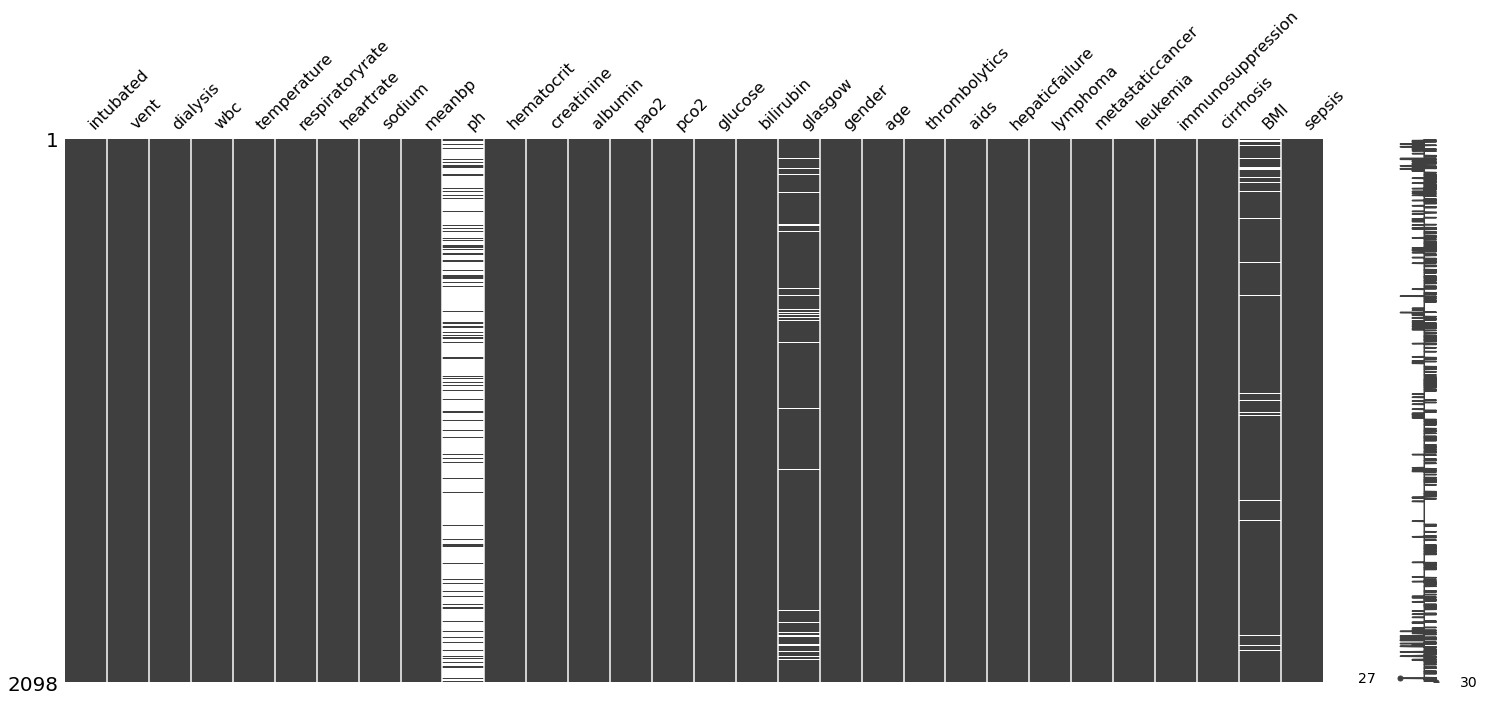

In [105]:
import missingno as msno
msno.matrix(data)

- Imputation of the remaining NaNs by MICE imputation strategies

In [106]:
missing_features=['ph','glasgow','BMI']

In [107]:
mice_imputer=IterativeImputer()
data[missing_features]=mice_imputer.fit_transform(data[missing_features])

In [108]:
# Check again
data.isnull().sum()

intubated            0
vent                 0
dialysis             0
wbc                  0
temperature          0
respiratoryrate      0
heartrate            0
sodium               0
meanbp               0
ph                   0
hematocrit           0
creatinine           0
albumin              0
pao2                 0
pco2                 0
glucose              0
bilirubin            0
glasgow              0
gender               0
age                  0
thrombolytics        0
aids                 0
hepaticfailure       0
lymphoma             0
metastaticcancer     0
leukemia             0
immunosuppression    0
cirrhosis            0
BMI                  0
sepsis               0
dtype: int64

#### FInal cleaned Dataset with sepsis as depedent variable

In [109]:
data.head()

intubated  vent  dialysis        wbc  temperature  respiratoryrate  \
0          0     0         0  10.200000         36.2             39.0   
1          0     0         0  11.700000         36.4             60.0   
2          0     0         0   7.900000         36.7              6.0   
3          0     0         0  21.100000         36.2             41.0   
4          0     0         0  12.101869         36.8             33.0   

   heartrate      sodium  meanbp        ph  hematocrit  creatinine   albumin  \
0       88.0  139.000000   108.0  7.373501   37.800000    1.040000  3.132796   
1       40.0  133.000000    47.0  7.373302   34.100000    1.140000  3.102848   
2      131.0  141.000000    61.0  7.373469   36.600000    0.630000  3.600000   
3       49.0  141.000000    72.0  7.373275   40.400000    1.050000  3.235184   
4      115.0  138.125932   107.0  7.373270   33.862326    1.579883  2.911055   

         pao2       pco2     glucose  bilirubin  glasgow  gender  age  \
0  126.771183  44.372360   61.000000   1.413441     15.0       1   87   
1  112.359820  44.437857  140.000000   2.029685     15.0       0   76   
2  125.537967  42.879074   82.000000   0.500000     15.0       1   34   
3  127.963443  44.028543  118.000000   1.418687     15.0       0   61   
4  125.705507  41.843400  170.109064   1.267734     15.0       1   55   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0              0     0               0         0                 0         0   
1              0     0               0         0                 0         0   
2              0     0               0         0                 0         0   
3              0     0               0         0                 0         0   
4              0     0               0         0                 0         0   

   immunosuppression  cirrhosis        BMI  sepsis  
0                  0          0  18.745276       0  
1                  0          0  27.788734       0  
2                  0          0  20.217741       0  
3                  0          0  29.007201       0  
4                  0          0  29.226505       0

In [110]:
data.describe()

intubated         vent     dialysis          wbc  temperature  \
count  2098.000000  2098.000000  2098.000000  2098.000000  2098.000000   
mean      0.104385     0.200191     0.030982    11.656957    36.430110   
std       0.305832     0.400238     0.173310     5.973963     0.874632   
min       0.000000     0.000000     0.000000     0.100000    22.200000   
25%       0.000000     0.000000     0.000000     8.100000    36.200000   
50%       0.000000     0.000000     0.000000    11.079343    36.434064   
75%       0.000000     0.000000     0.000000    13.408779    36.700000   
max       1.000000     1.000000     1.000000    82.500000    40.600000   

       respiratoryrate    heartrate       sodium       meanbp           ph  \
count      2098.000000  2098.000000  2098.000000  2098.000000  2098.000000   
mean         25.068996   100.338136   137.940855    84.698560     7.279897   
std          14.712327    31.313443     5.127656    39.505828     3.966758   
min           4.000000    20.000000   103.000000    40.000000  -174.313513   
25%          11.000000    87.000000   136.000000    54.000000     7.369793   
50%          27.000000   104.000000   138.000000    66.000000     7.373189   
75%          35.000000   121.000000   140.000000   120.000000     7.373384   
max          60.000000   206.000000   170.000000   200.000000     7.630000   

        hematocrit   creatinine      albumin         pao2         pco2  \
count  2098.000000  2098.000000  2098.000000  2098.000000  2098.000000   
mean     33.397899     1.506503     2.897047   126.904408    42.027675   
std       5.834205     1.415759     0.485699    35.582000     5.564182   
min      13.400000     0.100000     1.200000    27.000000    10.000000   
25%      30.300000     0.800000     2.689843   116.681979    41.000000   
50%      33.400000     1.300000     2.903042   126.458655    42.358663   
75%      36.600000     1.594951     3.148978   134.073009    43.282589   
max      55.700000    20.200000     5.100000   508.000000    94.000000   

           glucose    bilirubin      glasgow       gender          age  \
count  2098.000000  2098.000000  2098.000000  2098.000000  2098.000000   
mean    164.806490     1.224570    13.411127     0.393708    61.441849   
std      93.936216     1.530540     3.042124     0.488688    17.303146   
min       0.377150    -1.017876     3.000000     0.000000     0.000000   
25%     102.000000     0.687260    13.410341     0.000000    52.000000   
50%     149.982031     1.094929    15.000000     0.000000    63.000000   
75%     185.927964     1.454581    15.000000     1.000000    75.000000   
max     975.000000    33.400000    15.000000     1.000000    89.000000   

       thrombolytics    aids  hepaticfailure     lymphoma  metastaticcancer  \
count    2098.000000  2098.0     2098.000000  2098.000000       2098.000000   
mean        0.012869     0.0        0.013346     0.006196          0.020496   
std         0.112738     0.0        0.114779     0.078492          0.141722   
min         0.000000     0.0        0.000000     0.000000          0.000000   
25%         0.000000     0.0        0.000000     0.000000          0.000000   
50%         0.000000     0.0        0.000000     0.000000          0.000000   
75%         0.000000     0.0        0.000000     0.000000          0.000000   
max         1.000000     0.0        1.000000     1.000000          1.000000   

          leukemia  immunosuppression    cirrhosis           BMI       sepsis  
count  2098.000000        2098.000000  2098.000000  2.098000e+03  2098.000000  
mean      0.009056           0.026215     0.014776  4.129297e+03     0.130124  
std       0.094755           0.159814     0.120684  1.797491e+05     0.336520  
min       0.000000           0.000000     0.000000  2.291667e+00     0.000000  
25%       0.000000           0.000000     0.000000  2.336178e+01     0.000000  
50%       0.000000           0.000000     0.000000  2.759266e+01     0.000000  
75%       0.000000           0.00

###### Check the target variable for imbalancing 

###### The distribution of our target variable

Text(0.5, 1.0, 'Percentage of patients will/will not have sepsis')

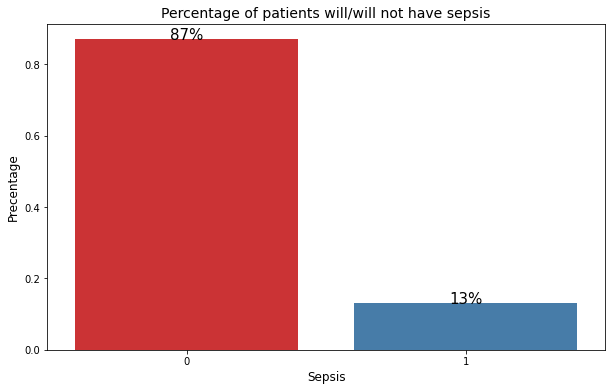

In [111]:
#Ploting barplot for target 
plt.figure(figsize=(10,6))
g = sns.barplot(data['sepsis'], data['sepsis'], palette='Set1', estimator=lambda x: len(x) / len(data) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Sepsis', fontsize=12)
plt.ylabel('Precentage', fontsize=12)
plt.title('Percentage of patients will/will not have sepsis', fontsize=14)

In [112]:
ind_col=[col for col in data.columns if col!='sepsis']
dep_col='sepsis'

In [113]:
X=data[ind_col]
y=data[dep_col]

###### spliting training and testing data

#### Feature Scaling for Machine Learning

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [115]:
print(X_train.shape)
print(X_test.shape)

(1678, 29)
(420, 29)


In [116]:
X_train.head()

intubated  vent  dialysis        wbc  temperature  respiratoryrate  \
801           1     1         0   9.135815         36.0             26.0   
681           0     0         0  17.600000         38.2             11.0   
1610          0     0         0  12.400000         36.0             38.0   
1723          0     0         0   6.600000         36.7             11.0   
483           0     0         0  25.500000         37.0             16.0   

      heartrate  sodium  meanbp        ph  hematocrit  creatinine   albumin  \
801       106.0   141.0    50.0  7.190000    35.51901        0.68  3.058504   
681        97.0   133.0    61.0  7.372830    28.60000        0.82  2.670343   
1610       86.0   139.0    58.0  7.371554    41.60000        1.16  3.300960   
1723      115.0   121.0    47.0  7.373410    40.60000        2.80  3.252927   
483       126.0   138.0    64.0  7.373474    45.50000        0.90  3.500000   

            pao2       pco2  glucose  bilirubin  glasgow  gender  age  \
801    57.000000  71.000000    103.0   1.265652     15.0       1   60   
681   131.559461  40.480806    229.0   1.142015     15.0       1   57   
1610  117.068028  42.665323    178.0   1.380915     14.0       0   83   
1723  121.727830  43.166839     88.0   1.400166     15.0       1   66   
483   127.764629  41.345653    181.0   0.500000     15.0       0   28   

      thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  \
801               0     0               0         0                 0   
681               0     0               0         0                 0   
1610              0     0               0         0                 0   
1723              0     0               0         0                 0   
483               0     0               0         0                 0   

      leukemia  immunosuppression  cirrhosis        BMI  
801          0                  0          0  37.016605  
681          0                  0          0  49.159862  
1610         0                  0          0  24.391988  
1723         0                  0          0  22.857143  
483          0                  0          0  20.000000

###### Normalization

Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. Standardization is also used on a feature-wise basis in most cases

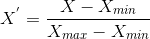

In [117]:
X_train.columns

Index(['intubated', 'vent', 'dialysis', 'wbc', 'temperature',
       'respiratoryrate', 'heartrate', 'sodium', 'meanbp', 'ph', 'hematocrit',
       'creatinine', 'albumin', 'pao2', 'pco2', 'glucose', 'bilirubin',
       'glasgow', 'gender', 'age', 'thrombolytics', 'aids', 'hepaticfailure',
       'lymphoma', 'metastaticcancer', 'leukemia', 'immunosuppression',
       'cirrhosis', 'BMI'],
      dtype='object')

In [118]:
from sklearn import preprocessing
X_train=preprocessing.normalize(X_train)
X_test=preprocessing.normalize(X_test)

In [119]:
X_train=pd.DataFrame(X_train, columns=['intubated', 'vent', 'dialysis', 'wbc', 'temperature',
       'respiratoryrate', 'heartrate', 'sodium', 'meanbp', 'ph', 'hematocrit',
       'creatinine', 'albumin', 'pao2', 'pco2', 'glucose', 'bilirubin',
       'glasgow', 'gender', 'age', 'thrombolytics', 'aids', 'hepaticfailure',
       'lymphoma', 'metastaticcancer', 'leukemia', 'immunosuppression',
       'cirrhosis', 'BMI'])

In [120]:
X_train.head()

intubated      vent  dialysis       wbc  temperature  respiratoryrate  \
0   0.004046  0.004046       0.0  0.036961     0.145647         0.105190   
1   0.000000  0.000000       0.0  0.052857     0.114725         0.033036   
2   0.000000  0.000000       0.0  0.041411     0.120225         0.126904   
3   0.000000  0.000000       0.0  0.026329     0.146403         0.043881   
4   0.000000  0.000000       0.0  0.082459     0.119646         0.051739   

   heartrate    sodium    meanbp        ph  hematocrit  creatinine   albumin  \
0   0.428850  0.570451  0.202288  0.029089    0.143701    0.002751  0.012374   
1   0.291317  0.399434  0.183199  0.022143    0.085893    0.002463  0.008020   
2   0.287205  0.464203  0.193696  0.024618    0.138927    0.003874  0.011024   
3   0.458757  0.482693  0.187492  0.029414    0.161961    0.011170  0.012977   
4   0.407444  0.446248  0.206956  0.023843    0.147133    0.002910  0.011318   

       pao2      pco2   glucose  bilirubin   glasgow    gender       age  \
0  0.230608  0.287248  0.416712   0.005121  0.060686  0.004046  0.242745   
1  0.395108  0.121575  0.687748   0.003430  0.045049  0.003003  0.171186   
2  0.390959  0.142485  0.594447   0.004612  0.046754  0.000000  0.277186   
3  0.485596  0.172201  0.351049   0.005586  0.059838  0.003989  0.263287   
4  0.413150  0.133699  0.585297   0.001617  0.048505  0.000000  0.090543   

   thrombolytics  aids  hepaticfailure  lymphoma  metastaticcancer  leukemia  \
0            0.0   0.0             0.0       0.0               0.0       0.0   
1            0.0   0.0             0.0       0.0               0.0       0.0   
2            0.0   0.0             0.0       0.0               0.0       0.0   
3            0.0   0.0             0.0       0.0               0.0       0.0   
4            0.0   0.0             0.0       0.0               0.0       0.0   

   immunosuppression  cirrhosis       BMI  
0                0.0        0.0  0.149760  
1                0.0        0.0  0.147640  
2                0.0        0.0  0.081459  
3                0.0        0.0  0.091182  
4                0.0        0.0  0.064674

In [121]:
X_test=pd.DataFrame(X_test, columns=['intubated', 'vent', 'dialysis', 'wbc', 'temperature',
       'respiratoryrate', 'heartrate', 'sodium', 'meanbp', 'ph', 'hematocrit',
       'creatinine', 'albumin', 'pao2', 'pco2', 'glucose', 'bilirubin',
       'glasgow', 'gender', 'age', 'thrombolytics', 'aids', 'hepaticfailure',
       'lymphoma', 'metastaticcancer', 'leukemia', 'immunosuppression',
       'cirrhosis', 'BMI'])

In [122]:
# Shape X_train
X_train.shape

(1678, 29)

In [123]:
# Shape X_test
X_test.shape

(420, 29)

###### Logistic Regression Feature Importance

In [124]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression(solver='lbfgs')
logre.fit(X_train,y_train)

LogisticRegression()

In [125]:
# Prediction
y_pred_log = logre.predict(X_test)
actual = []
predcition = []

In [126]:
for i, j in zip(y_test, y_pred_log):
    actual.append(i)
    predcition.append(j)

In [127]:
dic = {'Actual':actual,
       'Prediction':predcition
       }

In [128]:
result  = pd.DataFrame(dic)
result

Actual  Prediction
0         0           0
1         1           0
2         0           0
3         0           0
4         0           0
..      ...         ...
415       0           0
416       0           0
417       0           0
418       0           0
419       0           0

[420 rows x 2 columns]

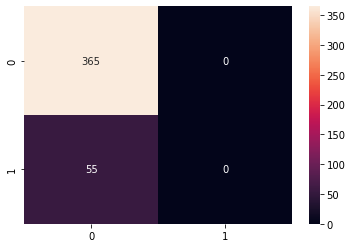

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       365
           1       0.00      0.00      0.00        55

    accuracy                           0.87       420
   macro avg       0.43      0.50      0.46       420
weighted avg       0.76      0.87      0.81       420



In [129]:
from sklearn.metrics import classification_report, confusion_matrix
sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True, fmt="d")
plt.show()
print(classification_report(y_test,y_pred_log))

###### ROC Curve Simple Logistic Regression

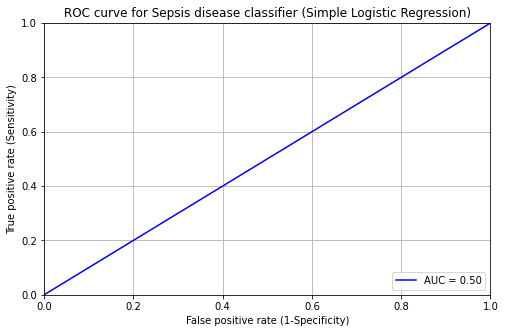

In [130]:
#import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
#roc_auc_log_reg = metrics.auc(fpr, tpr)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' %roc_auc_score(y_test,y_pred_log))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for Sepsis disease classifier (Simple Logistic Regression)")
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

###### Logistic Regression (class_weight=’balanced’)

We have added the class_weight parameter to our logistic regression algorithm and the value we have passed is ‘balanced'

The f1 score for the testing data: 0.35807860262008734


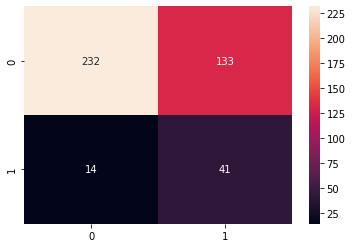

              precision    recall  f1-score   support

           0       0.94      0.64      0.76       365
           1       0.24      0.75      0.36        55

    accuracy                           0.65       420
   macro avg       0.59      0.69      0.56       420
weighted avg       0.85      0.65      0.71       420



In [131]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
#confusion_matrix(y_test, pred_test)
sns.heatmap(confusion_matrix(y_test,pred_test), annot=True, fmt="d")
plt.show()
print(classification_report(y_test,pred_test))

### How to Improve Class Imbalance using Class Weights in Machine Learning for Logistic Regression

Doc : https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/

##### Logistic Regression (class_weight=’balanced’)

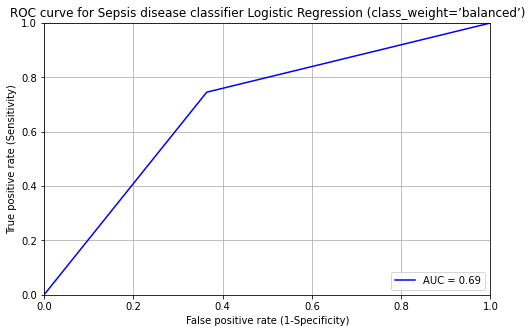

In [132]:
from sklearn.metrics import roc_curve
#roc_auc_log_reg_wt = metrics.auc(fpr, tpr)
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
plt.figure(figsize=(8,5))
plt.plot(fpr,tpr, 'b', label = 'AUC = %0.2f' %roc_auc_score(y_test,pred_test))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for Sepsis disease classifier Logistic Regression (class_weight=’balanced’)")
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

By adding a single class weight parameter to the logistic regression function, we have improved the f1 score by 30 percent. We can see in the confusion matrix that even though the misclassification for class 0 (no sepsis) has increased, the model can capture class 1 (sepsis) pretty well

###### Logistic Regression (manual class weights)

Finally, we are trying to find optimal weights with the highest score using grid search. We will search for weights between 0 to 1. The idea is, if we are giving n as the weight for the minority class, the majority class will get 1-n as the weights.

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

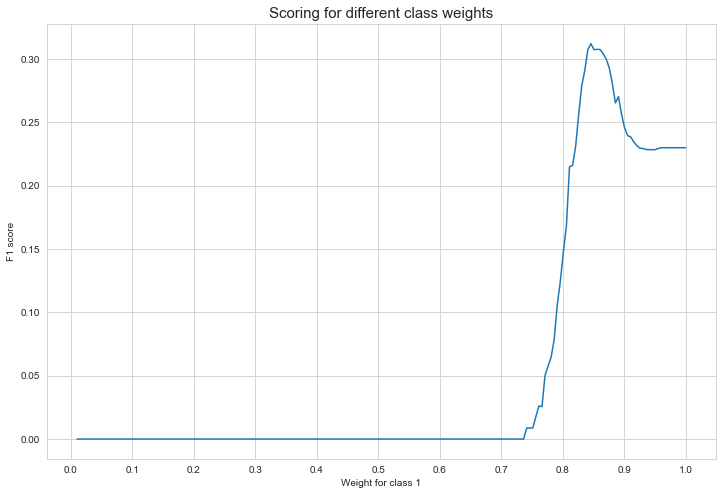

In [133]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=15)

Through the graph we can see that the highest value for the minority class is peaking at about 0.83532 class weight.

Using grid search, we got the best class weight, i.e.  0.16468 for class 0 (majority class), 1: 0.83532 for class 1 (minority class).

The f1 score for the testing data: 0.34375


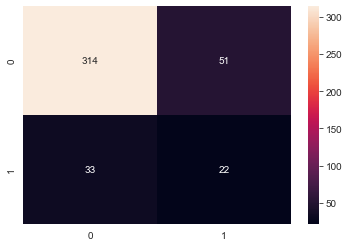

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       365
           1       0.30      0.40      0.34        55

    accuracy                           0.80       420
   macro avg       0.60      0.63      0.61       420
weighted avg       0.83      0.80      0.81       420



In [134]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.16468, 1: 0.83532})
lr.fit(X_train, y_train)

# Predicting on the test data
pred_test_wt = lr.predict(X_test)

#Calculating and printing the f1 score 
f1_test = f1_score(y_test, pred_test_wt)
print('The f1 score for the testing data:', f1_test)

#Ploting the confusion matrix
#confusion_matrix(y_test, pred_test)
sns.heatmap(confusion_matrix(y_test,pred_test_wt), annot=True, fmt="d")
plt.show()
print(classification_report(y_test,pred_test_wt))

<Figure size 576x360 with 0 Axes>

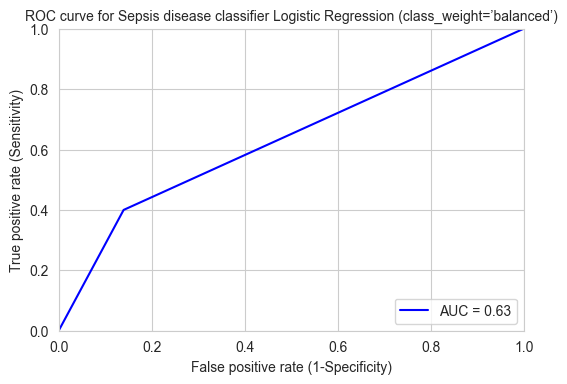

In [135]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test_wt)
plt.figure(figsize=(8,5))

#roc_auc = metrics.auc(fpr, tpr)
plt.figure(dpi=100)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %roc_auc_score(y_test, pred_test_wt))
plt.legend(loc = 'lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for Sepsis disease classifier Logistic Regression (class_weight=’balanced’)",  fontsize=10)
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

By manually changing the values of the weights the model did not improve the f1-score decrease by 6% approximately

#### Decision Tree Model

In [136]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation 

# Create Decision Tree classifier object
dt_clf=DecisionTreeClassifier()

# Train Decision Tree Classifier 
dt_clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_dt=dt_clf.predict(X_test)
print('Accuracy :', metrics.accuracy_score(y_test, y_pred_dt))

Accuracy : 0.7880952380952381


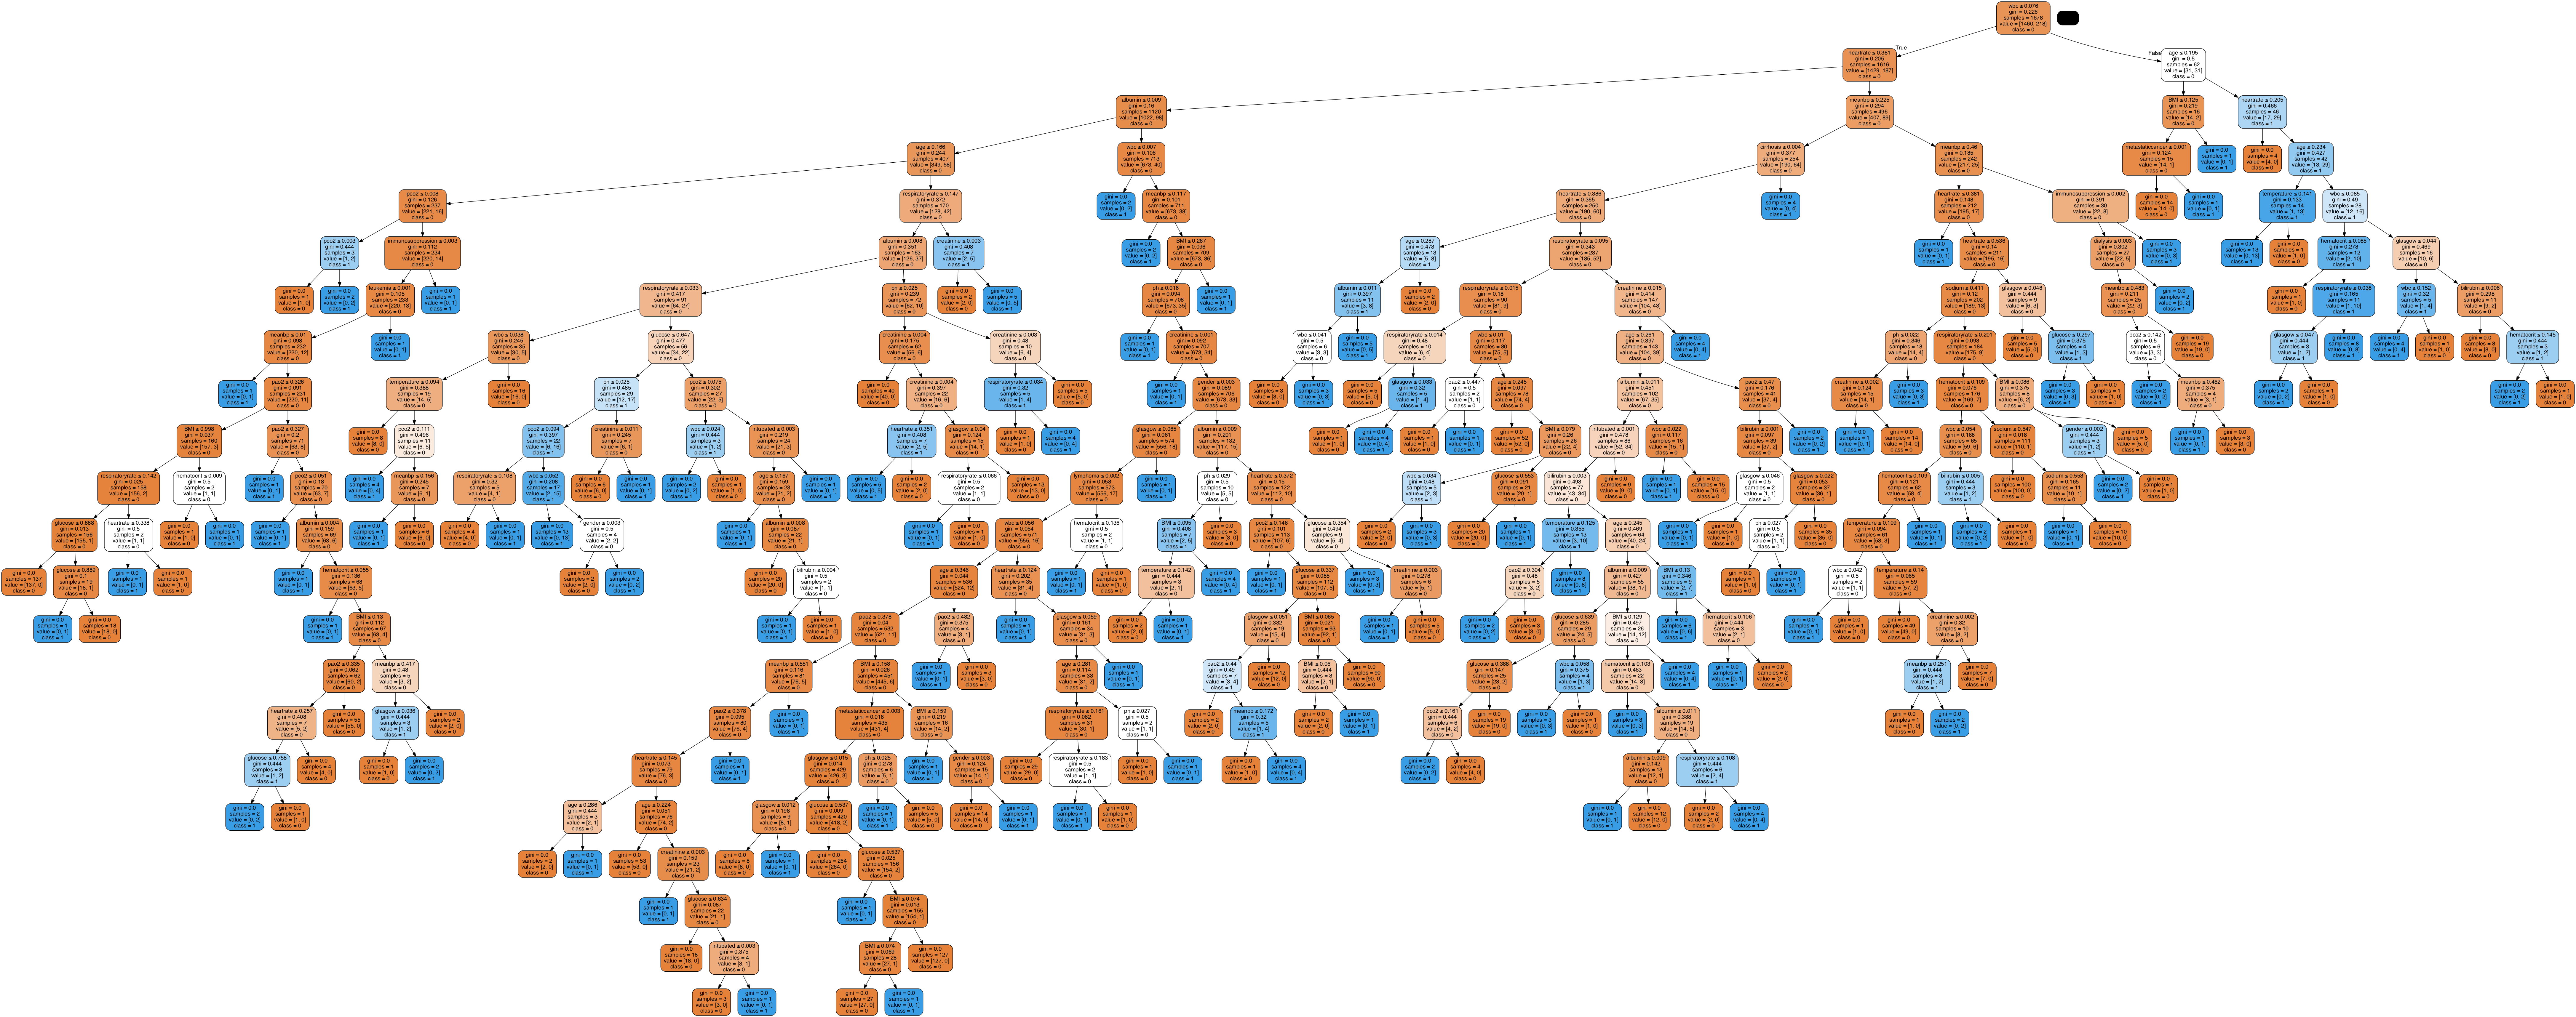

In [137]:
import six
import sys
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'
sys.modules['sklearn.externals.six'] = six

feature_cols = ['intubated', 'vent', 'dialysis', 'wbc', 'temperature',
       'respiratoryrate', 'heartrate', 'sodium', 'meanbp', 'ph', 'hematocrit',
       'creatinine', 'albumin', 'pao2', 'pco2', 'glucose', 'bilirubin',
       'glasgow', 'gender', 'age', 'thrombolytics', 'aids', 'hepaticfailure',
       'lymphoma', 'metastaticcancer', 'leukemia', 'immunosuppression',
       'cirrhosis', 'BMI']

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image
import pydotplus 

dot_data=StringIO()

export_graphviz(dt_clf, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True, 
               feature_names=feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('sepsis.png')
Image(graph.create_png())

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       365
           1       0.17      0.16      0.17        55

    accuracy                           0.79       420
   macro avg       0.52      0.52      0.52       420
weighted avg       0.78      0.79      0.79       420



[[322  43]
 [ 46   9]]


<AxesSubplot:>

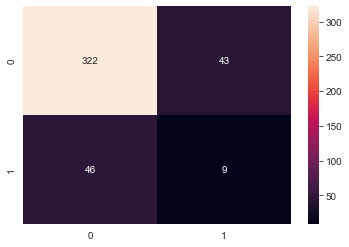

In [139]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_dt))
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True, fmt="d")

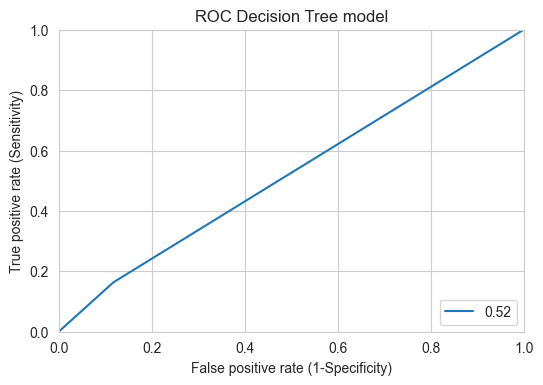

In [140]:
# ROC 
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr,tpr,label = "%.2f" %roc_auc_score(y_test,y_pred_dt))
plt.legend(loc = 'lower right')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Decision Tree model')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

In [175]:
plot_model(dt_clf, plot = 'ks')

NameError: name 'plot_model' is not defined

#### DecisionTreeClassifier with RandomizedSearCV

In [141]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf=RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2)
    rand_clf.fit(X_train, y_train)
    best_model=rand_clf.best_estimator_
    best_score=rand_clf.best_score_
    
    print('Training score :{:.3f}'.format(best_score))
    y_pred=best_model.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    print('Test score :{:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy','gini'],
                          'splitter':['random','best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 8, 10],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2, 4, 6, 8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score :0.870
Test score :0.869


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.9,
                       max_leaf_nodes=45, min_impurity_decrease=0.05,
                       min_samples_split=8, min_weight_fraction_leaf=0.0025,
                       random_state=2, splitter='random')

In [142]:
ds_clf=DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.9,
                       max_leaf_nodes=45, min_impurity_decrease=0.05,
                       min_samples_split=8, min_weight_fraction_leaf=0.0025,
                       random_state=2, splitter='random')

ds_clf.fit(X_train, y_train)
pred4=ds_clf.predict(X_test)
#evaluating_model(y_test, pred4)
print('Accuracy :', metrics.accuracy_score(y_test, pred4))

Accuracy : 0.8690476190476191


In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       365
           1       0.00      0.00      0.00        55

    accuracy                           0.87       420
   macro avg       0.43      0.50      0.46       420
weighted avg       0.76      0.87      0.81       420



[[365   0]
 [ 55   0]]


<AxesSubplot:>

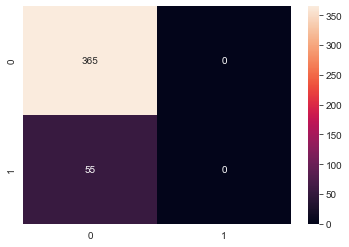

In [144]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred4))
sns.heatmap(confusion_matrix(y_test,pred4),annot=True, fmt="d")

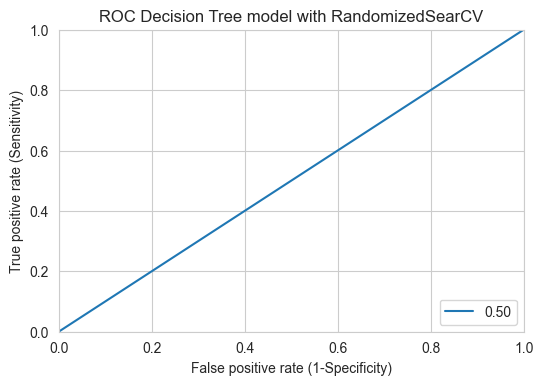

In [145]:
# ROC RandomizedSearCV
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, pred4)
plt.plot(fpr,tpr,label = "%.2f" %roc_auc_score(y_test,pred4))
plt.legend(loc = 'lower right')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Decision Tree model with RandomizedSearCV')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

#### Random Forest Classifier 

In [146]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params={
                          'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                           'max_depth':[None,2,4,6,8,10,20], 
}, clf=RandomForestClassifier(random_state=2))

Training score :0.872
Test score :0.869


RandomForestClassifier(max_depth=2, max_features=0.6, min_samples_leaf=2,
                       random_state=2)

In [147]:
rf_clf=RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

rf_clf.fit(X_train, y_train)
pred5=rf_clf.predict(X_test)
#evaluating_model(y_test, pred5)
print('Accuracy :', metrics.accuracy_score(y_test, pred5))

Accuracy : 0.8690476190476191


[[365   0]
 [ 55   0]]


<AxesSubplot:>

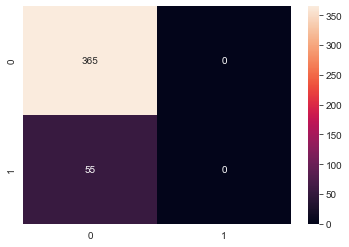

In [148]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred5))
sns.heatmap(confusion_matrix(y_test,pred5),annot=True, fmt="d")

#### XGBOOST 

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [149]:
import os
from xgboost import XGBClassifier
os.environ['KMP_DUPLICATE_LIB_OK']='True'
xgb1=XGBClassifier(colsample_bytree=1.0, #percentage of features used per tree. High value can lead to overfitting.
                  learning_rate=0.1, #step size shrinkage used to prevent overfitting. Range is [0,1]
                  max_depth=4, #determines how deeply each tree is allowed to grow during any boosting round
                  n_estimators=400, #number of trees you want to build
                  subsample=1.0,
                  n_jobs=-1)
                  #nthread=4)

eval_set=[(X_test, y_test)]
xgb1.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set,
        verbose=True)

[0]	validation_0-logloss:0.63851
[1]	validation_0-logloss:0.59364
[2]	validation_0-logloss:0.55583
[3]	validation_0-logloss:0.52467
[4]	validation_0-logloss:0.49784
[5]	validation_0-logloss:0.47590
[6]	validation_0-logloss:0.45621
[7]	validation_0-logloss:0.44084
[8]	validation_0-logloss:0.42600
[9]	validation_0-logloss:0.41510
[10]	validation_0-logloss:0.40505
[11]	validation_0-logloss:0.39673
[12]	validation_0-logloss:0.38827
[13]	validation_0-logloss:0.38086
[14]	validation_0-logloss:0.37521
[15]	validation_0-logloss:0.37058
[16]	validation_0-logloss:0.36605
[17]	validation_0-logloss:0.36215
[18]	validation_0-logloss:0.35874
[19]	validation_0-logloss:0.35666
[20]	validation_0-logloss:0.35489
[21]	validation_0-logloss:0.35300
[22]	validation_0-logloss:0.35146
[23]	validation_0-logloss:0.34925
[24]	validation_0-logloss:0.34827
[25]	validation_0-logloss:0.34542
[26]	validation_0-logloss:0.34442
[27]	validation_0-logloss:0.34364
[28]	validation_0-logloss:0.34193
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [150]:
pred6=xgb1.predict(X_test)
#evaluating_model(y_test, pred6)
print('Accuracy :', metrics.accuracy_score(y_test, pred6))

Accuracy : 0.8642857142857143


[[361   4]
 [ 53   2]]


<AxesSubplot:>

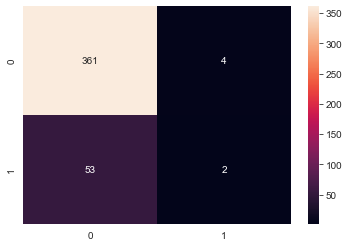

In [151]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred6))
sns.heatmap(confusion_matrix(y_test,pred6),annot=True, fmt="d")

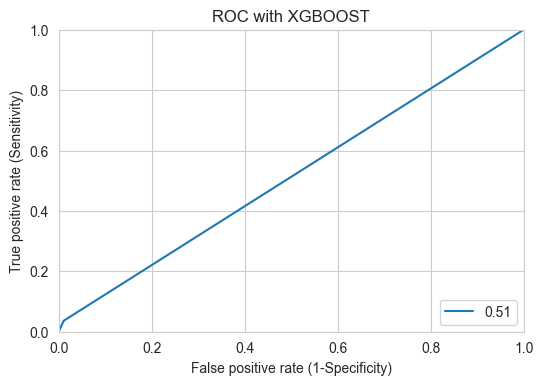

In [152]:
# ROC XGBOOST
from sklearn.metrics import roc_curve, roc_auc_score
plt.figure(dpi=100)
fpr, tpr, thresholds = roc_curve(y_test, pred6)
plt.plot(fpr,tpr,label = "%.2f" %roc_auc_score(y_test,pred6))
plt.legend(loc = 'lower right')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC with XGBOOST')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

plt.grid(True)

#### Deep Learning Model 

In [153]:
import tensorflow as tf 
import theano
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.utils import np_utils
#from keras.optimizers import rmsprop_v2, Adam
#from keras.layers import Activation
#from keras.layers import a
#from keras.optimizers import SGD
from tensorflow.keras import layers
#from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam

In [154]:
print('Before vectorized labels')
print('Shape y_train :',y_train.shape)
print('Shape y_test :',y_test.shape)

Before vectorized labels
Shape y_train : (1678,)
Shape y_test : (420,)


In [155]:
# Our vectorized labels
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
# X_train 
#X_train = np.asarray(X_train).astype('float32').reshape((-1,1))

In [156]:
print('After vectorized labels')
print('Shape y_train :',y_train.shape)
print('Shape y_test :',y_test.shape)

After vectorized labels
Shape y_train : (1678,)
Shape y_test : (420,)


In [157]:
X_train.shape

(1678, 29)

###### Building ANN Model

In [158]:
model=Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))

# Adding the second hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0005), loss='binary_crossentropy',
             metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1920      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 196)               25284     
                                                                 
 dense_3 (Dense)             (None, 196)               38612     
                                                                 
 batch_normalization (BatchN  (None, 196)              7

2022-01-22 18:38:56.764973: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


##### Fitting the model

In [159]:
history=model.fit(X_train, y_train, epochs=15,
                  batch_size=128, verbose=0,
                 validation_data=(X_test, y_test))

###### Evaluating Performance using Accuracy, Loss and Confusion Matrix 

In [160]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


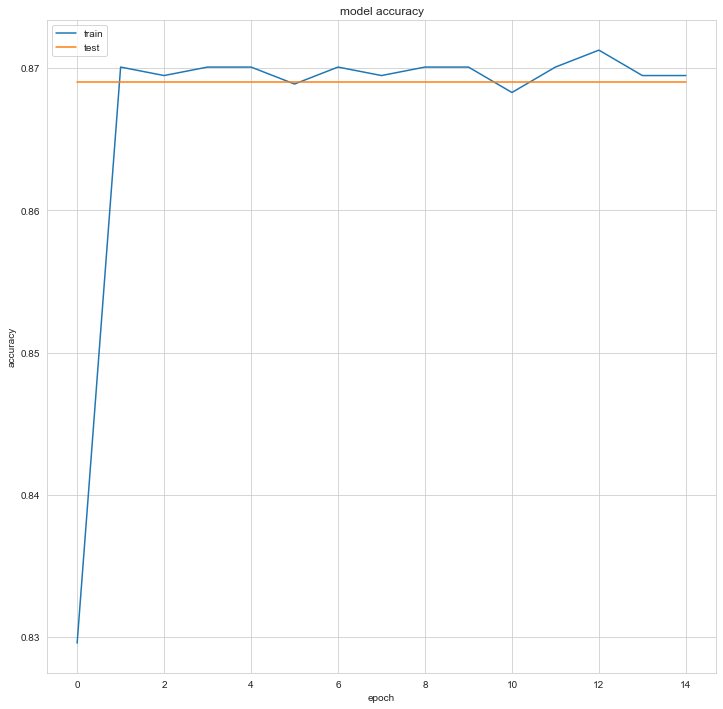

In [161]:
plt.figure(figsize=(12,12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

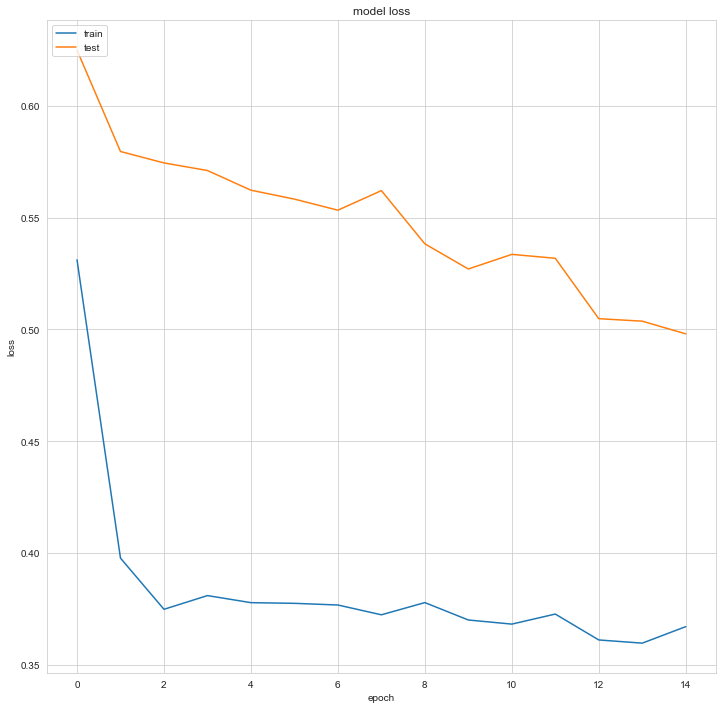

In [162]:
# summarize history for loss 
plt.figure(figsize=(12,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [163]:
score, acc = model.evaluate(X_train, y_train,
                            batch_size=15)

112/112 [==============================] - 0s 1ms/step - loss: 0.4986 - accuracy: 0.8701


In [164]:
print('Train score:', score)
print('Train accuracy:', acc)

Train score: 0.498564213514328
Train accuracy: 0.8700834512710571


In [165]:
# # Part 3 - Making predictions and evaluating the model
from sklearn.metrics import confusion_matrix
ann_pred=model.predict(X_test)
ann_pred=(ann_pred>0.5)

In [166]:
print('*'*20)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)

********************
42/42 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.8690


In [167]:
print('Test score:', score)
print('Test accuracy:', acc)

Test score: 0.49806153774261475
Test accuracy: 0.8690476417541504


<AxesSubplot:>

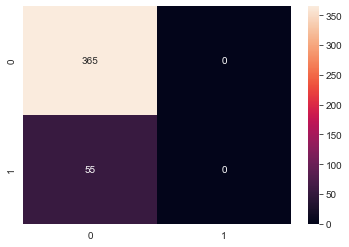

In [168]:
cnf_matrix=confusion_matrix(y_test, ann_pred)
#print(cnf_matrix)
sns.heatmap(confusion_matrix(y_test,ann_pred),annot=True, fmt="d")

In [169]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,ann_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       365
           1       0.00      0.00      0.00        55

    accuracy                           0.87       420
   macro avg       0.43      0.50      0.46       420
weighted avg       0.76      0.87      0.81       420



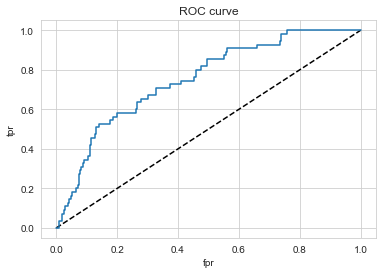

In [170]:
from sklearn.metrics import roc_curve
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [171]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7507347447073475

[CV] END ......................class_weight={0: 0.0, 1: 1.0}; total time=   0.1s
[CV] END class_weight={0: 0.009949748743718593, 1: 0.9900502512562814}; total time=   0.0s
[CV] END class_weight={0: 0.014924623115577889, 1: 0.9850753768844221}; total time=   0.1s
[CV] END class_weight={0: 0.024874371859296484, 1: 0.9751256281407035}; total time=   0.0s
[CV] END class_weight={0: 0.054723618090452265, 1: 0.9452763819095478}; total time=   0.1s
[CV] END class_weight={0: 0.054723618090452265, 1: 0.9452763819095478}; total time=   0.1s
[CV] END class_weight={0: 0.06964824120603015, 1: 0.9303517587939698}; total time=   0.0s
[CV] END class_weight={0: 0.06964824120603015, 1: 0.9303517587939698}; total time=   0.0s
[CV] END class_weight={0: 0.08457286432160804, 1: 0.915427135678392}; total time=   0.0s
[CV] END class_weight={0: 0.08457286432160804, 1: 0.915427135678392}; total time=   0.0s
[CV] END class_weight={0: 0.09949748743718594, 1: 0.9005025125628141}; total time=   0.0s
[CV] END class_w

[CV] END class_weight={0: 0.8208542713567839, 1: 0.1791457286432161}; total time=   0.0s
[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=   0.1s
[CV] END class_weight={0: 0.8258291457286432, 1: 0.1741708542713568}; total time=   0.0s
[CV] END class_weight={0: 0.855678391959799, 1: 0.144321608040201}; total time=   0.0s
[CV] END class_weight={0: 0.855678391959799, 1: 0.144321608040201}; total time=   0.0s
[CV] END class_weight={0: 0.855678391959799, 1: 0.144321608040201}; total time=   0.0s
[CV] END class_weight={0: 0.855678391959799, 1: 0.144321608040201}; total time=   0.0s
[CV] END class_weight={0: 0.8855276381909548, 1: 0.11447236180904519}; total time=   0.0s
[CV] END class_weight={0: 0.8855276381909548, 1: 0.11447236180904519}; total time=   0.0s
[CV] END class_weight={0: 0.8855276381909548, 1: 0.11447236180904519}; total time=   0.0s
[CV] END class_weight={0: 0.8905025125628141, 1: 0.1094974874371859}; total time=   0.0s
[CV] END class_weight={0: 

[CV] END class_weight={0: 0.23879396984924622, 1: 0.7612060301507537}; total time=   0.0s
[CV] END class_weight={0: 0.23879396984924622, 1: 0.7612060301507537}; total time=   0.0s
[CV] END class_weight={0: 0.23879396984924622, 1: 0.7612060301507537}; total time=   0.0s
[CV] END class_weight={0: 0.26864321608040204, 1: 0.731356783919598}; total time=   0.0s
[CV] END class_weight={0: 0.26864321608040204, 1: 0.731356783919598}; total time=   0.0s
[CV] END class_weight={0: 0.26864321608040204, 1: 0.731356783919598}; total time=   0.0s
[CV] END class_weight={0: 0.2736180904522613, 1: 0.7263819095477386}; total time=   0.0s
[CV] END class_weight={0: 0.2984924623115578, 1: 0.7015075376884422}; total time=   0.0s
[CV] END class_weight={0: 0.3034673366834171, 1: 0.6965326633165829}; total time=   0.0s
[CV] END class_weight={0: 0.3034673366834171, 1: 0.6965326633165829}; total time=   0.1s
[CV] END class_weight={0: 0.3034673366834171, 1: 0.6965326633165829}; total time=   0.0s
[CV] END class_wei

[CV] END class_weight={0: 0.32336683417085427, 1: 0.6766331658291458}; total time=   0.0s
[CV] END class_weight={0: 0.32834170854271355, 1: 0.6716582914572864}; total time=   0.0s
[CV] END class_weight={0: 0.32834170854271355, 1: 0.6716582914572864}; total time=   0.0s
[CV] END class_weight={0: 0.35819095477386936, 1: 0.6418090452261307}; total time=   0.0s
[CV] END class_weight={0: 0.35819095477386936, 1: 0.6418090452261307}; total time=   0.0s
[CV] END class_weight={0: 0.35819095477386936, 1: 0.6418090452261307}; total time=   0.0s
[CV] END class_weight={0: 0.35819095477386936, 1: 0.6418090452261307}; total time=   0.0s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.0s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.0s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.0s
[CV] END class_weight={0: 0.39301507537688446, 1: 0.6069849246231156}; total time=   0.0s
[CV] END c